**SUGGESTION:**
- Use google colab to check the codes (LINK: https://colab.research.google.com/drive/1eJgiVJlHpZcLis_06HtAmn4k7fFjy_Mf?usp=sharing)
- Use the content

# Quick Check: Final Model with Best Result 

In [2]:
import pandas as pd
import numpy as np

### Set path

In [ ]:
path = '/content/gdrive/My Drive/BT5153/22.3.28'

### Input Data

In [3]:
origin_train = pd.read_csv('/content/gdrive/My Drive/BT5153/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/test.csv')

print("# of valid original training data:", np.shape(origin_train))
print("# of test data:", np.shape(test))

print("# of unique id in valid original training data:", origin_train['Id'].nunique())
print("# of unique id in test data:", test['Id'].nunique())

print(origin_train.head())

# of valid original training data: (48162, 3)
# of test data: (28863, 2)
# of unique id in valid original training data: 48162
# of unique id in test data: 28863
                                             Comment  Outcome     Id
0  use variables in the outer function instead of...        1  17489
1  if you're looking for something as nice as pyt...        1  37982
2  i use the tail() function: tail(vector, n=1) t...        1  29641
3  combining lindelof's and gregg lind's ideas: l...        1  39557
4  you can drop any row containing a missing usin...        1  14288


### EDA on the original training dataset

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px

# of records in class 1: 28851
# of records in class 0: 19311


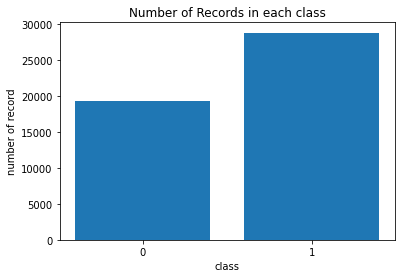

In [5]:
# calculate the number of each class
n_1 = len(origin_train[origin_train['Outcome']==1])
n_0 = len(origin_train[origin_train['Outcome']==0])
print("# of records in class 1:", n_1)
print("# of records in class 0:", n_0)
plt.bar([1,0],[n_1,n_0])
plt.xticks([1,0])
plt.xlabel('class')
plt.ylabel('number of record')
plt.title('Number of Records in each class')
plt.show()

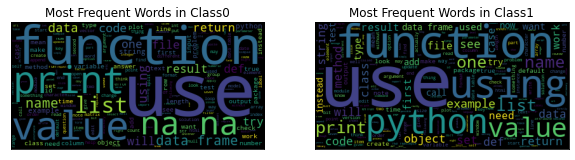

In [ ]:
# find high-frequency words in each class
fig, ax = plt.subplots(1, 2, figsize=(10,5))

def word_cloud(text, class_nb):
  wordcloud = WordCloud().generate((" ").join([ i for i in text]))
  ax[class_nb].imshow(wordcloud.recolor(random_state=2017))
  ax[class_nb].set_title('Most Frequent Words in Class' + str(class_nb))
  ax[class_nb].set_xticks([])
  ax[class_nb].set_yticks([])

text_0 = origin_train[origin_train['Outcome']==0]['Comment'].values.tolist()
word_cloud(text_0, 0)
text_1 = origin_train[origin_train['Outcome']==1]['Comment'].values.tolist()
word_cloud(text_1, 1)

plt.show()

In [ ]:
# calculate length of text in each class
def text_size(text_list):
    sizes = []
    for text in text_list:
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)



class0_size = text_size(text_0)
class1_size = text_size(text_1)
print("avg text length of class 0:", np.mean(class0_size))
print("avg text length of class 1:", np.mean(class1_size))

avg text length of class 0: 75.09673243229247
avg text length of class 1: 120.39977817060067


### Data Preprocessing

In [ ]:
# import re
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# from nltk.corpus import stopwords
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# from bs4 import BeautifulSoup
# !pip install texthero==1.1.0 -q
# import texthero as hero

In [ ]:
# # basic cleaning
# def review_to_words( raw_review ):
#     # # 1. Remove HTML
#     # review_text = BeautifulSoup(raw_review).get_text() 
#     # 2. Only keep letters
#     letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
#     # letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
#     # 3. Remove URLs
#     clean_text = hero.remove_urls(pd.Series(letters_only))[0]
#     # 4. Convert to lower case
#     words = clean_text.lower() 
                            
    
#     return words 

In [ ]:
# origin_train["clean"] = origin_train['Comment'].apply(review_to_words)
# test["clean"] = test['Comment'].apply(review_to_words)
# print(origin_train.head)

In [ ]:
# save all the datasets after preprocessing
# origin_train.to_csv(path+'/origin_train_easyclean.csv', index=False)
# test.to_csv(path+'/test_easyclean.csv', index=False)

### Model: Simpletransformers

reference: https://github.com/ThilinaRajapakse/simpletransformers

In [ ]:
# # input the datasets after preprocessing
# origin_train = pd.read_csv(path+'/origin_train_easyclean.csv')
# test = pd.read_csv(path+'/test_easyclean.csv')

#### install package

In [ ]:
! pip install simpletransformers

     |████████████████████████████████| 249 kB 10.5 MB/s 
     |████████████████████████████████| 10.1 MB 22.9 MB/s 
     |████████████████████████████████| 1.7 MB 57.6 MB/s 
     |████████████████████████████████| 325 kB 55.7 MB/s 
     |████████████████████████████████| 3.8 MB 37.1 MB/s 
     |████████████████████████████████| 6.5 MB 69.9 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 62.7 MB/s 
     |████████████████████████████████| 895 kB 56.7 MB/s 
     |████████████████████████████████| 596 kB 55.4 MB/s 
     |████████████████████████████████| 67 kB 7.6 MB/s 
     |████████████████████████████████| 181 kB 73.7 MB/s 
     |████████████████████████████████| 144 kB 75.3 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 212 kB 76.7 MB/s 
     |████████████████████████████████| 1.1 MB 54.8 MB/s 
     |████████████████████████████████| 134 kB 78.7 MB/s 
     |█████████████

#### Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_features, validation_features, train_labels, validation_labels = train_test_split(origin_train['clean'], origin_train['Outcome'], test_size=0.3, random_state=123)
# train_clean = pd.DataFrame(columns={'text','labels'})
# train_clean['text'] = train_features
# train_clean['labels'] = train_labels
# validation_clean = pd.DataFrame(columns={'text','labels'})
# validation_clean['text'] = validation_features
# validation_clean['labels'] = validation_labels

In [ ]:
train_features, validation_features, train_labels, validation_labels = train_test_split(origin_train['Comment'], origin_train['Outcome'], test_size=0.3, random_state=123)
train_comment = pd.DataFrame(columns={'text','labels'})
train_comment['text'] = train_features
train_comment['labels'] = train_labels
validation_comment = pd.DataFrame(columns={'text','labels'})
validation_comment['text'] = validation_features
validation_comment['labels'] = validation_labels

#### Build model

In [ ]:
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import accuracy_score

##### original dataset
epochs = 3 0.75
epochs = 2 0.757

In [ ]:
# train on dataset without cleaning
args = {'num_train_epochs': 2}
spl_model = ClassificationModel('bert', 'bert-base-uncased', args = args, use_cuda=True)
spl_model.train_model(train_comment)

In [ ]:
train_pred, raw_outputs = spl_model.predict(train_comment['text'].values.tolist())
print("Train acc:", accuracy_score(train_comment['labels'],train_pred))
validation_pred, raw_outputs = spl_model.predict(validation_comment['text'].values.tolist())
print("Validation acc:", accuracy_score(validation_comment['labels'],validation_pred))

  0%|          | 0/33713 [00:00<?, ?it/s]

  0%|          | 0/4215 [00:00<?, ?it/s]

Train acc: 0.8914661999822027


  0%|          | 0/14449 [00:00<?, ?it/s]

  0%|          | 0/1807 [00:00<?, ?it/s]

Validation acc: 0.7574226590075438


In [ ]:
# retrain with all the original training dataset
args = {'num_train_epochs': 2}
spl_model = ClassificationModel('bert', 'bert-base-uncased', args = args, use_cuda=True)
spl_model.train_model(train_comment)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

  0%|          | 0/33713 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/4215 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/4215 [00:00<?, ?it/s]

(8430, 0.5131483471690548)

In [ ]:
test_pred, raw_outputs = spl_model.predict(test['Comment'].values.tolist())
df_result = pd.DataFrame()
df_result['Id'] = test['Id']
df_result['Outcome'] = test_pred
df_result.to_csv(path+'/result_simpletransformer_comment.csv', index=False)

  0%|          | 0/28863 [00:00<?, ?it/s]

  0%|          | 0/3608 [00:00<?, ?it/s]

##### cleaned dataset 

In [ ]:
# # train on dataset with easy preprocessing
# args = {'num_train_epochs': 5}
# spl_model_easyclean = ClassificationModel('bert', 'bert-base-uncased', args = args, use_cuda=True)
# spl_model_easyclean.train_model(train_clean)


In [ ]:
# train_pred, raw_outputs = spl_model_easyclean.predict(train_clean['text'].values.tolist())
# print("Train acc:", accuracy_score(train_clean['labels'],train_pred))
# validation_pred, raw_outputs = spl_model_easyclean.predict(validation_clean['text'].values.tolist())
# print("Validation acc:", accuracy_score(validation_clean['labels'],validation_pred))

In [ ]:
# test_pred, raw_outputs = spl_model_easyclean.predict(test['clean'].values.tolist())
# df_result = pd.DataFrame()
# df_result['Id'] = test['Id']
# df_result['Outcome'] = test_pred
# df_result.to_csv(path+'/result_simpletransformer_clean.csv', index=False)

# The Whole Steps of Exploratory Start From HERE

## Environment

In [1]:
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

# First try: completed preprocessing + training data spliting before training w2v and + oversampling


## Set path

In [ ]:
path = '/content/gdrive/My Drive/BT5153/22.3.21'

## Input Data

In [ ]:
origin_train = pd.read_csv('/content/gdrive/My Drive/BT5153/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/test.csv')

print("# of valid original training data:", np.shape(origin_train))
print("# of test data:", np.shape(test))

print("# of unique id in valid original training data:", origin_train['Id'].nunique())
print("# of unique id in test data:", test['Id'].nunique())

print(origin_train.head())

# of valid original training data: (48162, 3)
# of test data: (28863, 2)
# of unique id in valid original training data: 48162
# of unique id in test data: 28863
                                             Comment  Outcome     Id
0  use variables in the outer function instead of...        1  17489
1  if you're looking for something as nice as pyt...        1  37982
2  i use the tail() function: tail(vector, n=1) t...        1  29641
3  combining lindelof's and gregg lind's ideas: l...        1  39557
4  you can drop any row containing a missing usin...        1  14288


## EDA on the original training dataset

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px

# of records in class 1: 28851
# of records in class 0: 19311


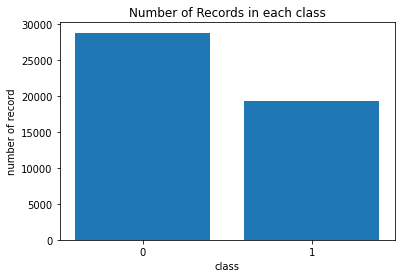

In [ ]:
# calculate the number of each class
n_1 = len(origin_train[origin_train['Outcome']==1])
n_0 = len(origin_train[origin_train['Outcome']==0])
print("# of records in class 1:", n_1)
print("# of records in class 0:", n_0)
plt.bar([0,1],[n_1,n_0])
plt.xticks([0,1])
plt.xlabel('class')
plt.ylabel('number of record')
plt.title('Number of Records in each class')
plt.show()

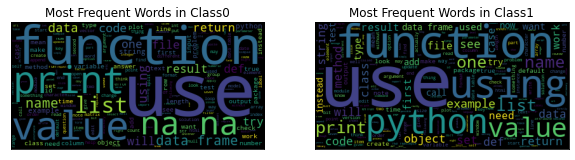

In [ ]:
# find high-frequency words in each class
fig, ax = plt.subplots(1, 2, figsize=(10,5))

def word_cloud(text, class_nb):
  wordcloud = WordCloud().generate((" ").join([ i for i in text]))
  ax[class_nb].imshow(wordcloud.recolor(random_state=2017))
  ax[class_nb].set_title('Most Frequent Words in Class' + str(class_nb))
  ax[class_nb].set_xticks([])
  ax[class_nb].set_yticks([])

text_0 = origin_train[origin_train['Outcome']==0]['Comment'].values.tolist()
word_cloud(text_0, 0)
text_1 = origin_train[origin_train['Outcome']==1]['Comment'].values.tolist()
word_cloud(text_1, 1)

plt.show()

In [ ]:
# calculate length of text in each class
def text_size(text_list):
    sizes = []
    for text in text_list:
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)



class0_size = text_size(text_0)
class1_size = text_size(text_1)
print("avg text length of class 0:", np.mean(class0_size))
print("avg text length of class 1:", np.mean(class1_size))

avg text length of class 0: 75.09673243229247
avg text length of class 1: 120.39977817060067


## Split the training dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
id_train, id_val, y_train, y_test = train_test_split(origin_train['Id'], origin_train['Outcome'], train_size=0.7)

train = origin_train[origin_train['Id'].isin(id_train)]
validation = origin_train[origin_train['Id'].isin(id_val)]

print("# of training data:", np.shape(train))
print("# of validation data:", np.shape(validation))

# of training data: (33713, 3)
# of validation data: (14449, 3)


## Data Preprocessing

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
!pip install texthero==1.1.0 -q
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 235 kB 16.9 MB/s 
     |████████████████████████████████| 1.5 MB 62.9 MB/s 
     |████████████████████████████████| 749 kB 68.1 MB/s 


In [ ]:
# basic cleaning
def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    # 2. Only keep letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    # 3. Remove URLs
    clean_text = hero.remove_urls(pd.Series(letters_only))[0]
    # 4. Convert to lower case
    words = clean_text.lower() 
                            
    
    return words 

In [ ]:
train["clean"] = train['Comment'].apply(review_to_words)
validation["clean"] = validation['Comment'].apply(review_to_words)
test["clean"] = test['Comment'].apply(review_to_words)
print(train.head)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.devpro.it/json/files/json-js.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://pypi.python.org/pypi/ghostscript/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

<bound method NDFrame.head of                                                  Comment  Outcome     Id  \
1      if you're looking for something as nice as pyt...        1  37982   
3      combining lindelof's and gregg lind's ideas: l...        1  39557   
4      you can drop any row containing a missing usin...        1  14288   
5      you need to use strptime() to convert the stri...        1   2461   
6      you are, indeed, passing the object around and...        1  39216   
...                                                  ...      ...    ...   
48157  use dict.get() which will return the value ass...        1  27104   
48158  below is answering the original first question...        1  12619   
48159  how does the python 3.6 dictionary implementat...        1  23396   
48160  i think you're seeing over-allocation patterns...        1  22612   
48161  thanks everyone for helping me to understand t...        1  33579   

                                                   clean 

In [ ]:
# remove stopwords, single character and lemmatization 
def words_lemmatizer(text, encoding="utf8"):
  words = nltk.word_tokenize(text)
  lemma_words = []
  wl = WordNetLemmatizer()
  for word in words:
      pos = find_pos(word)
      lemma_words.append(wl.lemmatize(word, pos))
  return " ".join(lemma_words)

def find_pos(word):
  # Part of Speech constants
  # ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'

  pos = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
  
  # Adjective tags - 'JJ', 'JJR', 'JJS'
  if pos.lower()[0] == 'j':
      return 'a'
  # Adverb tags - 'RB', 'RBR', 'RBS'
  elif pos.lower()[0] == 'r':
      return 'r'
  # Verb tags - 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'
  elif pos.lower()[0] == 'v':
      return 'v'

  # Noun tags - 'NN', 'NNS', 'NNP', 'NNPS'
  else:
      return 'n'

def improve_clean(words_string):
  stop_words = set(stopwords.words('english'))
  # 1. tokenize
  txt = re.split(r'[^\w]+', str(words_string))
  # 2. remove stopwords and single character
  txt = [word for word in txt if word not in stop_words and len(word)>1]
  # 3. lemmatization
  txt = [words_lemmatizer(word) for word in txt]
  return (" ").join(txt)


In [ ]:
txt = [improve_clean(doc) for doc in train.clean.values]
train["improve_clean"] = txt
txt = [improve_clean(doc) for doc in validation.clean.values]
validation["improve_clean"] = txt
txt = [improve_clean(doc) for doc in test.clean.values]
test["improve_clean"] = txt
print(train.head())


KeyboardInterrupt



In [ ]:
# save all the datasets after preprocessing
train.to_csv('/content/gdrive/My Drive/BT5153/preprocess_train.csv', index=False)
validation.to_csv('/content/gdrive/My Drive/BT5153/preprocess_validation.csv', index=False)
test.to_csv('/content/gdrive/My Drive/BT5153/preprocess_test.csv', index=False)

## Model

In [ ]:
# input the datasets after preprocessing
train = pd.read_csv('/content/gdrive/My Drive/BT5153/preprocess_train.csv')
validation = pd.read_csv('/content/gdrive/My Drive/BT5153/preprocess_validation.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/preprocess_test.csv')

### 1) Word-level CNN

#### record tuning results


- embedding_dim = 100
  - Train loss: 0.002009833697229624
  - Train accuracy: 0.9994051456451416
  - Validation loss: 1.5796167850494385
  - Validation accuracy: 0.7043502330780029

- embedding_dim = 50
  - Train loss: 0.001829880871810019
  - Train accuracy: 0.9995786547660828
  - Validation loss: 1.5298998355865479
  - Validation accuracy: 0.7051122188568115

- embedding_dim = 1000
  - Train loss: 0.004043365363031626
  - Train accuracy: 0.9987360239028931
  - Validation loss: 1.9661303758621216
  - Validation accuracy: 0.6848157644271851

#### modeling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

In [ ]:
# deal with null
train_dropna = train.dropna()
validation_dropna = validation.dropna()

def coverna(row):
  if isinstance(row['improve_clean'], float):
    return row['clean']
  else:
    return row['improve_clean']

test_coverna = test.copy()
test_coverna['improve_clean'] = test.apply(coverna, axis=1)

In [ ]:
# extract the features and labels
train_labels = train_dropna['Outcome']
train_features = train_dropna['improve_clean']
validation_labels = validation_dropna['Outcome']
validation_features = validation_dropna['improve_clean']
test_features = test_coverna['improve_clean']

In [ ]:
print("\nbefore oversampling:\n")
print(train_labels.value_counts())

# oversampling
ros = RandomOverSampler(random_state=20)
train_features, train_labels = ros.fit_resample(np.array(train_features).reshape(-1, 1), train_labels)
tmp = pd.DataFrame(train_features, columns=['train_features'])
train_features = tmp['train_features']
print("\nafter oversampling:\n")
print(train_labels.value_counts())


before oversampling:

1    20174
0    13496
Name: Outcome, dtype: int64

after oversampling:

1    20174
0    20174
Name: Outcome, dtype: int64


In [ ]:
# tokenize
vocab_size = len(train_features)
tk = Tokenizer(num_words=vocab_size)
tk.fit_on_texts(train_features)

In [ ]:
# Convert string to index
train_sequences = tk.texts_to_sequences(train_features)
validation_sequences = tk.texts_to_sequences(validation_features)
test_sequences = tk.texts_to_sequences(test_features)

In [ ]:
# Padding
sequence_length = max([len(ele) for ele in train_sequences]) 
train_data = pad_sequences(train_sequences, maxlen=sequence_length, padding='post')
validation_data = pad_sequences(validation_sequences, maxlen=sequence_length, padding='post')
test_data = pad_sequences(test_sequences, maxlen=sequence_length, padding='post')
print("the input sequence's length is fixed to be {}".format(sequence_length))

the input sequence's length is fixed to be 2144


In [ ]:
# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
train_classes = np.array(train_labels, dtype='int')
validation_data = np.array(validation_data, dtype='float32')
validation_classes = np.array(validation_labels, dtype='int')
test_data = np.array(test_data, dtype='float32')

In [ ]:
embedding_dim = 100
input_shape = (sequence_length,)
model_input = Input(shape=input_shape)

# Embedding Layer
z_cnn = Embedding(vocab_size, embedding_dim, input_length=sequence_length, name="embedding")(model_input)

In [ ]:
# Convolutional Layer 
conv_blocks = []
#capture two-grams, 3-grams and 4 grams
filter_sizes = [2,3,4]
#for each filter, the number of filters
num_filters = 30
#loop over the different filter sizes
for sz in filter_sizes:
    # sz is the window size
    conv = Conv1D(filters=num_filters,
                  kernel_size=sz,
                  padding="valid",
                  activation="relu",
                  strides=1)(z_cnn)
    # Pooling Layer
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
# Fully-connected Layer
hiddenz = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# Output Layer
model_output = Dense(1, activation="sigmoid")(hiddenz)
cnn_model = Model(model_input, model_output)
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(cnn_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2144)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 2144, 100)    4034800     ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 2143, 30)     6030        ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2142, 30)     9030        ['embedding[0][0]']              
                                                                                              

In [ ]:
# Training
cnn_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=10,
          verbose=2)

Epoch 1/10
1261/1261 - 37s - loss: 0.5796 - accuracy: 0.6954 - val_loss: 0.5573 - val_accuracy: 0.7136 - 37s/epoch - 30ms/step
Epoch 2/10
1261/1261 - 28s - loss: 0.4066 - accuracy: 0.8190 - val_loss: 0.5909 - val_accuracy: 0.7130 - 28s/epoch - 22ms/step
Epoch 3/10
1261/1261 - 25s - loss: 0.2203 - accuracy: 0.9172 - val_loss: 0.7107 - val_accuracy: 0.7007 - 25s/epoch - 20ms/step
Epoch 4/10
1261/1261 - 25s - loss: 0.0946 - accuracy: 0.9712 - val_loss: 0.8376 - val_accuracy: 0.6983 - 25s/epoch - 20ms/step
Epoch 5/10
1261/1261 - 28s - loss: 0.0387 - accuracy: 0.9905 - val_loss: 0.9899 - val_accuracy: 0.6909 - 28s/epoch - 22ms/step
Epoch 6/10
1261/1261 - 28s - loss: 0.0173 - accuracy: 0.9959 - val_loss: 1.1385 - val_accuracy: 0.6877 - 28s/epoch - 22ms/step
Epoch 7/10
1261/1261 - 25s - loss: 0.0102 - accuracy: 0.9975 - val_loss: 1.2613 - val_accuracy: 0.6847 - 25s/epoch - 20ms/step
Epoch 8/10
1261/1261 - 25s - loss: 0.0060 - accuracy: 0.9984 - val_loss: 1.4240 - val_accuracy: 0.6869 - 25s/ep

In [ ]:
cnn_model.save(path+'/word_level_cnn_model') 
# cnn_model= load_model(path+'/word_level_cnn_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/word_level_cnn_model/assets


In [ ]:
# evaluate the model
train_score = cnn_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.004298098385334015
Train accuracy: 0.9986120462417603
Validation loss: 1.6880989074707031
Validation accuracy: 0.688902735710144


In [ ]:
test_prob = cnn_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_word_level_cnn_model.csv', index=False)

In [ ]:
del cnn_model

### 2) W2V

#### Build Bigrams

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
# deal with null
train_dropna = train.dropna()
validation_dropna = validation.dropna()

def coverna(row):
  if isinstance(row['clean'], float):
    return row['Comment']
  else:
    return row['clean']

test_coverna = test.copy()
test_coverna['clean'] = test.apply(coverna, axis=1)

In [ ]:
# build bigrams
train_sent = [row.split() for row in train_dropna['clean']]
phrases = Phrases(train_sent, min_count=10, progress_per=10000)
bigram = Phraser(phrases)
train_dropna['bigram'] = bigram[train_sent]

validation_sent = [row.split() for row in validation_dropna['clean']]
validation_dropna['bigram'] = bigram[validation_sent]
test_sent = [row.split() for row in test_coverna['clean']]
test_coverna['bigram'] = bigram[test_sent]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# extract the bigram and labels
train_labels = train_dropna['Outcome']
train_bigram = train_dropna['bigram']
validation_labels = validation_dropna['Outcome']
validation_bigram = validation_dropna['bigram']
test_bigram = test_coverna['bigram']

In [ ]:
print("\nbefore oversampling:\n")
print(train_labels.value_counts())

# oversampling
ros = RandomOverSampler(random_state=20)
train_bigram, train_labels = ros.fit_resample(np.array(train_bigram).reshape(-1, 1), train_labels)
tmp = pd.DataFrame(train_bigram, columns=['train_bigram'])
train_bigram = tmp['train_bigram']
print("\nafter oversampling:\n")
print(train_labels.value_counts())


before oversampling:

1    20174
0    13496
Name: Outcome, dtype: int64

after oversampling:

1    20174
0    20174
Name: Outcome, dtype: int64


#### Word2Vec Training

In [ ]:
# gensim support multi-core training
import multiprocessing
cores = multiprocessing.cpu_count()
from gensim.models import Word2Vec

In [ ]:
# set hyperparameter of w2v model
embedding_dim = 100

w2v_model = Word2Vec(min_count=10,
                     window=3,
                     size=embedding_dim,
                     sample=6e-5, 
                     alpha=0.05, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
# build the vocabulary
w2v_model.build_vocab(train_bigram, progress_per=10000)

In [ ]:
# train the model
w2v_model.train(train_bigram, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

(57416921, 132103360)

In [ ]:
# save the model
w2v_model.save(path+'/w2v_model')
# w2v_model = load_model(path+'/w2v_model')

In [ ]:
# w2v_model.init_sims(replace=True)
w2v_model.init_sims(replace=True)

In [ ]:
# extract the word vectors
vocab_list = [word for word in w2v_model.wv.vocab]

word_index = {" ": 0}
word_vector = {}

embeddings_matrix = np.zeros((len(vocab_list) + 1, w2v_model.vector_size))

for i in range(len(vocab_list)):
    word = vocab_list[i]  
    word_index[word] = i + 1  
    word_vector[word] = w2v_model.wv[word] 
    embeddings_matrix[i + 1] = w2v_model.wv[word]  


In [ ]:
print("the shape of the embedding matrix is:", np.shape(embeddings_matrix))

the shape of the embedding matrix is: (14770, 100)


#### Set the sequence datasets

In [ ]:
# tokenize
def to_sequence(sentences, word_index=word_index):
  result = []
  for sentence in sentences:
    txt = []
    for word in sentence:
      try:
        txt.append(word_index[word])
      except:
        txt.append(0)
    result.append(txt)
  return result

In [ ]:
# Convert string to index
train_sequences = to_sequence(train_bigram)
validation_sequences = to_sequence(validation_bigram)
test_sequences = to_sequence(test_bigram)


In [ ]:
# Padding
sequence_length = max([len(ele) for ele in train_sequences]) 
train_data = pad_sequences(train_sequences, maxlen=sequence_length, padding='post')
validation_data = pad_sequences(validation_sequences, maxlen=sequence_length, padding='post')
test_data = pad_sequences(test_sequences, maxlen=sequence_length, padding='post')
print("the input sequence's length is fixed to be {}".format(sequence_length))

the input sequence's length is fixed to be 2864


In [ ]:
print(np.shape(train_data))

(40348, 2864)


In [ ]:
# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
train_classes = np.array(train_labels, dtype='int')
validation_data = np.array(validation_data, dtype='float32')
validation_classes = np.array(validation_labels, dtype='int')
test_data = np.array(test_data, dtype='float32')

#### 2.1) Build and Train the CNN Model

In [ ]:
embedding_dim = 100
input_shape = (sequence_length,)
model_input = Input(shape=input_shape)

# Embedding Layer
embedder = Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding')(model_input)

In [ ]:
# Convolutional Layer 
conv_blocks = []
#capture two-grams, 3-grams and 4 grams
filter_sizes = [2,3,4]
#for each filter, the number of filters
num_filters = 30
#loop over the different filter sizes
for sz in filter_sizes:
    # sz is the window size
    conv = Conv1D(filters=num_filters,
                  kernel_size=sz,
                  padding="valid",
                  activation="relu",
                  strides=1)(embedder)
    # Pooling Layer
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
# Fully-connected Layer
hiddenz = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# Output Layer
model_output = Dense(1, activation="sigmoid")(hiddenz)
cnn_w2v_model = Model(model_input, model_output)
cnn_w2v_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(cnn_w2v_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2864)]       0           []                               
                                                                                                  
 w2v_embedding (Embedding)      (None, 2864, 100)    1477000     ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 2863, 30)     6030        ['w2v_embedding[0][0]']          
                                                                                                  
 conv1d_4 (Conv1D)              (None, 2862, 30)     9030        ['w2v_embedding[0][0]']          
                                                                                            

In [ ]:
# Training
cnn_w2v_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=10,
          verbose=2)

Epoch 1/10
1261/1261 - 33s - loss: 0.5613 - accuracy: 0.7123 - val_loss: 0.5512 - val_accuracy: 0.7165 - 33s/epoch - 26ms/step
Epoch 2/10
1261/1261 - 30s - loss: 0.3825 - accuracy: 0.8346 - val_loss: 0.5821 - val_accuracy: 0.7165 - 30s/epoch - 24ms/step
Epoch 3/10
1261/1261 - 30s - loss: 0.2121 - accuracy: 0.9249 - val_loss: 0.6675 - val_accuracy: 0.7186 - 30s/epoch - 24ms/step
Epoch 4/10
1261/1261 - 32s - loss: 0.0893 - accuracy: 0.9752 - val_loss: 0.8172 - val_accuracy: 0.7148 - 32s/epoch - 25ms/step
Epoch 5/10
1261/1261 - 32s - loss: 0.0310 - accuracy: 0.9943 - val_loss: 0.9677 - val_accuracy: 0.7102 - 32s/epoch - 25ms/step
Epoch 6/10
1261/1261 - 30s - loss: 0.0123 - accuracy: 0.9981 - val_loss: 1.1089 - val_accuracy: 0.7060 - 30s/epoch - 24ms/step
Epoch 7/10
1261/1261 - 30s - loss: 0.0063 - accuracy: 0.9988 - val_loss: 1.2583 - val_accuracy: 0.7063 - 30s/epoch - 24ms/step
Epoch 8/10
1261/1261 - 32s - loss: 0.0035 - accuracy: 0.9993 - val_loss: 1.3889 - val_accuracy: 0.7044 - 32s/ep

In [ ]:
cnn_w2v_model.save(path+'/cnn_w2v_model') 
# cnn_w2v_model = load_model(path+'/cnn_w2v_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/cnn_w2v_model/assets


In [ ]:
# evaluate the model
train_score = cnn_w2v_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_w2v_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.0016819944139569998
Train accuracy: 0.9995538592338562
Validation loss: 1.6676626205444336
Validation accuracy: 0.7027570009231567


In [ ]:
test_prob = cnn_w2v_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_cnn_w2v_model.csv', index=False)

In [ ]:
del cnn_w2v_model

#### 2.2) RF Model


##### record tuning results


- n_estimators=1000
   - Train accuracy: 0.9996034499851294
   - Validation accuracy: 0.6378498198947077
- n_estimators = 1000, max_depth = 100
   - Train accuracy: 0.9996034499851294
   - Validation accuracy: 0.6409670268772513
- n_estimators = 1000, max_depth = 80
   - Train accuracy: 0.9996034499851294
   - Validation accuracy: 0.6402050429481851
- n_estimators = 100, max_depth = 100
   - Train accuracy: 0.9996034499851294
   - Validation accuracy: 0.6329315599889166

##### modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100)
rf_model.fit(train_data, train_labels)
train_predict= rf_model.predict(train_data)
validation_predict = rf_model.predict(validation_data)

In [ ]:
print("Train accuracy:", metrics.accuracy_score(train_labels, train_predict))
print("Validation accuracy:", metrics.accuracy_score(validation_labels, validation_predict))

Train accuracy: 0.9996034499851294
Validation accuracy: 0.6329315599889166


In [ ]:
test_predict = rf_model.predict(test_data)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_w2v_rf_model.csv', index=False)

#### 2.3) CNN Model - > less complicated


##### record tuning results


- dropout = 0.2 and epochs = 10
  - vali acc: 0.7019

- dropout = 0.4 and epochs = 10
  - Train loss: 0.02688155323266983
  - Train accuracy: 0.9934321641921997
  - Validation loss: 1.6087830066680908
  - Validation accuracy: 0.6935439109802246

- dropout = 0.2 and epochs = 8
  - Train loss: 0.014864042401313782
  - Train accuracy: 0.9972489476203918
  - Validation loss: 1.319148302078247
  - Validation accuracy: 0.7035189867019653

- dropout = 0.2 and epochs = 5
  - Train loss: 0.049616146832704544
  - Train accuracy: 0.9902845025062561
  - Validation loss: 0.9186396598815918
  - Validation accuracy: 0.7105153799057007

- dropout = 0.2 and epochs = 3
  - Train loss: 0.15859867632389069
  - Train accuracy: 0.9597253799438477
  - Validation loss: 0.6313296556472778
  - Validation accuracy: 0.7197977304458618

- dropout = 0.2 and epochs = 2 (upload2)
   - Train loss: 0.27732667326927185
   - Train accuracy: 0.9060919880867004
   - Validation loss: 0.5630913376808167
   - Validation accuracy: 0.723261296749115

##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

In [ ]:
embedding_dim = 100
input_shape = (sequence_length,)
model_input = Input(shape=input_shape)

# Embedding Layer
embedder = Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding')(model_input)

In [ ]:
# Convolutional Layer 
conv_blocks = []
#capture two-grams, 3-grams and 4 grams
filter_sizes = [2,3,4]
#for each filter, the number of filters
num_filters = 30
#loop over the different filter sizes
for sz in filter_sizes:
    # sz is the window size
    conv = Conv1D(filters=num_filters,
                  kernel_size=sz,
                  padding="valid",
                  activation="relu",
                  strides=1)(embedder)
    # Pooling Layer
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
# Fully-connected Layer
hiddenz = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# Dropout
dropout = Dropout(0.2)(hiddenz)
# Output Layer
model_output = Dense(1, activation="sigmoid")(dropout)
cnn_w2v_model = Model(model_input, model_output)
cnn_w2v_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(cnn_w2v_model.summary())

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 2864)]       0           []                               
                                                                                                  
 w2v_embedding (Embedding)      (None, 2864, 100)    1477000     ['input_10[0][0]']               
                                                                                                  
 conv1d_27 (Conv1D)             (None, 2863, 30)     6030        ['w2v_embedding[0][0]']          
                                                                                                  
 conv1d_28 (Conv1D)             (None, 2862, 30)     9030        ['w2v_embedding[0][0]']          
                                                                                            

In [ ]:
# Training
cnn_w2v_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=2,
          verbose=2)

Epoch 1/2
1261/1261 - 34s - loss: 0.5752 - accuracy: 0.6993 - val_loss: 0.5465 - val_accuracy: 0.7201 - 34s/epoch - 27ms/step
Epoch 2/2
1261/1261 - 31s - loss: 0.4254 - accuracy: 0.8095 - val_loss: 0.5631 - val_accuracy: 0.7233 - 31s/epoch - 25ms/step


In [ ]:
cnn_w2v_model.save(path+'/less_cnn_w2v_model') 
# cnn_w2v_model = load_model(path+'/less_cnn_w2v_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.22/less_cnn_w2v_model/assets


In [ ]:
# evaluate the model
train_score = cnn_w2v_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_w2v_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.27732667326927185
Train accuracy: 0.9060919880867004
Validation loss: 0.5630913376808167
Validation accuracy: 0.723261296749115


In [ ]:
test_prob = cnn_w2v_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_less_cnn_w2v_model.csv', index=False)

In [ ]:
del cnn_w2v_model

#### 2.4) CNN Model - > rebulid model


##### record tuning results

w2v min_count = 3, filter_sizes = [2,3,4,5]
- dropout = 0.5 and epochs = 2, batch_size=8
  - Train loss: 0.2723889648914337
  - Train accuracy: 0.904927134513855
  - Validation loss: 0.5719479918479919
  - Validation accuracy: 0.7161956429481506 

w2v min_count = 3, filter_sizes = [2,3], num_filter=10(22.3.23upload2)
- dropout = 0.5 and epochs = 2, batch_size=32
  - Train loss: 0.39250853657722473
  - Train accuracy: 0.8519629240036011
  - Validation loss: 0.5657262802124023
  - Validation accuracy: 0.7080909013748169

w2v min_count = 3, filter_sizes = [2,4,6], num_filter=30 (candidate2)
- dropout = 0.5 and epochs = 2, batch_size=32
  - Train loss: 0.292192667722702
  - Train accuracy: 0.894641637802124
  - Validation loss: 0.5801642537117004
  - Validation accuracy: 0.7209753394126892


w2v min_count = 3, filter_sizes = [2,4,6], num_filter=30 (22.3.23 upload3)
- dropout = 0.5 and epochs = 2, batch_size=16
  - Train loss: 0.2748199701309204
  - Train accuracy: 0.9060671925544739
  - Validation loss: 0.5758119225502014
  - Validation accuracy: 0.715641438961029

w2v min_count = 3, filter_sizes = [2,4,6,8], num_filter=100
- dropout = 0.5 and epochs = 2, batch_size=16
  - Train loss: 0.2334456592798233
  - Train accuracy: 0.9225736260414124
  - Validation loss: 0.5942085981369019
  - Validation accuracy: 0.7159878015518188


w2v min_count = 5, filter_sizes = [2,4,6,8], num_filter=100
- dropout = 0.5 and epochs = 2, batch_size=16
  - Train loss: 0.24742373824119568
  - Train accuracy: 0.9155844449996948
  - Validation loss: 0.5945281386375427
  - Validation accuracy: 0.7145330905914307

w2v min_count = 5, filter_sizes = [2,4,6,8], num_filter=30
- dropout = 0.5 and epochs = 2, batch_size=32
  - Train loss: 0.30240529775619507
  - Train accuracy: 0.8904035091400146
  - Validation loss: 0.5785220861434937
  - Validation accuracy: 0.721321702003479

w2v min_count = 5, filter_sizes = [2,4,6,8], num_filter=50
- dropout = 0.5 and epochs = 2, batch_size=32

##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

In [ ]:
embedding_dim = 100
input_shape = (sequence_length,)
model_input = Input(shape=input_shape)

# Embedding Layer
embedder = Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding')(model_input)

In [ ]:
# Convolutional Layer 
conv_blocks = []
#capture two-grams, 3-grams and 4 grams
filter_sizes = [2,4,6,8]
#for each filter, the number of filters
num_filters = 50
#loop over the different filter sizes
for sz in filter_sizes:
    # sz is the window size
    conv = Conv1D(filters=num_filters,
                  kernel_size=sz,
                  padding="valid",
                  activation="relu",
                  strides=1)(embedder)
    # Pooling Layer
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
# Fully-connected Layer
hiddenz = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# Dropout
dropout = Dropout(0.5)(hiddenz)
# Output Layer
model_output = Dense(1, activation="sigmoid")(dropout)
cnn_w2v_model = Model(model_input, model_output)
cnn_w2v_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(cnn_w2v_model.summary())

Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 2864)]       0           []                               
                                                                                                  
 w2v_embedding (Embedding)      (None, 2864, 100)    2157200     ['input_27[0][0]']               
                                                                                                  
 conv1d_84 (Conv1D)             (None, 2863, 50)     10050       ['w2v_embedding[0][0]']          
                                                                                                  
 conv1d_85 (Conv1D)             (None, 2861, 50)     20050       ['w2v_embedding[0][0]']          
                                                                                           

In [ ]:
# Training
cnn_w2v_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=2,
          verbose=2)

Epoch 1/2
1261/1261 - 50s - loss: 0.5799 - accuracy: 0.6951 - val_loss: 0.5451 - val_accuracy: 0.7232 - 50s/epoch - 40ms/step
Epoch 2/2
1261/1261 - 49s - loss: 0.4310 - accuracy: 0.8055 - val_loss: 0.5835 - val_accuracy: 0.7132 - 49s/epoch - 39ms/step


In [ ]:
cnn_w2v_model.save(path+'/less_cnn_w2v_model') 
# cnn_w2v_model = load_model(path+'/less_cnn_w2v_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.23/less_cnn_w2v_model/assets


In [ ]:
# evaluate the model
train_score = cnn_w2v_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_w2v_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.2847844362258911
Train accuracy: 0.899028480052948
Validation loss: 0.5834541916847229
Validation accuracy: 0.7132169604301453


In [ ]:
test_prob = cnn_w2v_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_less_cnn_w2v_model.csv', index=False)

In [ ]:
del cnn_w2v_model

#### 2.5) CNN --> another version

##### record tuning results

(upload2)after oversampling
Train loss: 0.3489963412284851
Train accuracy: 0.8600674271583557
Validation loss: 0.5569337606430054
Validation accuracy: 0.727140486240387
(upload3)before oversampling
Train loss: 0.3819330632686615
Train accuracy: 0.8451143503189087
Validation loss: 0.5462389588356018
Validation accuracy: 0.7266556024551392

##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional,Conv2D,MaxPooling2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 
from tensorflow.keras import optimizers

In [ ]:
# kernel size
kernel_size = 8
# stride size
stride_size = 1
# number of filters
filters = 4
num_filters=50

cnn_model = Sequential()
cnn_model.add(Input(shape=(np.shape(train_data)[1],)))
# Embedding Layer
cnn_model.add(Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding'))
# feature extraction layer 0: convolution
cnn_model.add(Conv1D(filters=num_filters,
                  kernel_size=kernel_size,
                  padding="valid",
                  activation="relu",
                  strides=1))
# feature extraction layer 1: max pooling
cnn_model.add(GlobalMaxPooling1D())
# classification layer 2: flattening
cnn_model.add(Flatten())
# classification layer 3: dense non-linear transformation
cnn_model.add(Dense(8, batch_size=32, activation='relu'))
# classification layer 4: output label probability
cnn_model.add(Dense(1,activation='sigmoid'))
# configure the model
cnn_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 w2v_embedding (Embedding)   (None, 2864, 100)         2007500   
                                                                 
 conv1d_2 (Conv1D)           (None, 2857, 50)          40050     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 408       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                      

In [ ]:
# Training
cnn_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=10,
          verbose=2)

Epoch 1/10
1053/1053 - 19s - loss: 0.6333 - accuracy: 0.6303 - val_loss: 0.6041 - val_accuracy: 0.6656 - 19s/epoch - 18ms/step
Epoch 2/10
1053/1053 - 18s - loss: 0.5823 - accuracy: 0.6898 - val_loss: 0.5773 - val_accuracy: 0.6985 - 18s/epoch - 17ms/step
Epoch 3/10
1053/1053 - 18s - loss: 0.5524 - accuracy: 0.7181 - val_loss: 0.5641 - val_accuracy: 0.7101 - 18s/epoch - 17ms/step
Epoch 4/10
1053/1053 - 18s - loss: 0.5288 - accuracy: 0.7384 - val_loss: 0.5564 - val_accuracy: 0.7143 - 18s/epoch - 17ms/step
Epoch 5/10
1053/1053 - 19s - loss: 0.5075 - accuracy: 0.7532 - val_loss: 0.5532 - val_accuracy: 0.7147 - 19s/epoch - 18ms/step
Epoch 6/10
1053/1053 - 19s - loss: 0.4876 - accuracy: 0.7702 - val_loss: 0.5491 - val_accuracy: 0.7174 - 19s/epoch - 18ms/step
Epoch 7/10
1053/1053 - 19s - loss: 0.4676 - accuracy: 0.7832 - val_loss: 0.5473 - val_accuracy: 0.7210 - 19s/epoch - 18ms/step
Epoch 8/10
1053/1053 - 18s - loss: 0.4473 - accuracy: 0.7985 - val_loss: 0.5467 - val_accuracy: 0.7221 - 18s/ep

In [ ]:
cnn_model.save(path+'/result_cnn_model_2') 
# cnn_model = load_model(path+'/result_cnn_model_2')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.24/result_cnn_model_2/assets


In [ ]:
# evaluate the model
train_score = cnn_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.38020333647727966
Train accuracy: 0.8453222513198853
Validation loss: 0.5472837090492249
Validation accuracy: 0.7241618037223816


In [ ]:
test_prob = cnn_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_cnn_model_2.csv', index=False)

In [ ]:
del cnn_model

#### 2.6) CNN --> one more version

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional,Conv2D,MaxPooling2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 
from tensorflow.keras import optimizers

In [ ]:
with tf.device('/device:GPU:0'):
  # kernel size
  kernel_size = 10
  # stride size
  stride_size = 1
  # number of filters
  num_filters = 50
  embedding_dim=200

  cnn_model = Sequential()
  cnn_model.add(Input(shape=(np.shape(train_data)[1],)))
  # Embedding Layer
  cnn_model.add(Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding'))
  # feature extraction layer 0: convolution
  cnn_model.add(Conv1D(filters=num_filters,
                    kernel_size=kernel_size,
                    padding="valid",
                    activation="relu",
                    strides=1))
  # feature extraction layer 1: max pooling
  cnn_model.add(GlobalMaxPooling1D())
  # classification layer 2: flattening
  cnn_model.add(Flatten())
  cnn_model.add(Dropout(0.5))
  # classification layer 3: dense non-linear transformation
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  # classification layer 4: output label probability
  cnn_model.add(Dense(1,activation='sigmoid'))
  # configure the model
  cnn_model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(learning_rate=1e-3),
                    metrics=['accuracy'])
  # Training
  cnn_model.fit(train_data, train_classes,
            validation_data=(validation_data, validation_classes),
            batch_size=16,
            epochs=10,
            verbose=2)

Epoch 1/10
2105/2105 - 57s - loss: 0.6065 - accuracy: 0.6727 - val_loss: 0.5728 - val_accuracy: 0.7011 - 57s/epoch - 27ms/step
Epoch 2/10
2105/2105 - 45s - loss: 0.5613 - accuracy: 0.7165 - val_loss: 0.5645 - val_accuracy: 0.7086 - 45s/epoch - 21ms/step
Epoch 3/10
2105/2105 - 45s - loss: 0.5361 - accuracy: 0.7356 - val_loss: 0.5617 - val_accuracy: 0.7127 - 45s/epoch - 22ms/step
Epoch 4/10
2105/2105 - 46s - loss: 0.5124 - accuracy: 0.7521 - val_loss: 0.5638 - val_accuracy: 0.7104 - 46s/epoch - 22ms/step
Epoch 5/10
2105/2105 - 45s - loss: 0.4794 - accuracy: 0.7754 - val_loss: 0.5679 - val_accuracy: 0.7144 - 45s/epoch - 21ms/step
Epoch 6/10
2105/2105 - 45s - loss: 0.4438 - accuracy: 0.7986 - val_loss: 0.5723 - val_accuracy: 0.7116 - 45s/epoch - 22ms/step
Epoch 7/10
2105/2105 - 45s - loss: 0.4041 - accuracy: 0.8196 - val_loss: 0.6153 - val_accuracy: 0.7126 - 45s/epoch - 21ms/step
Epoch 8/10
2105/2105 - 45s - loss: 0.3659 - accuracy: 0.8422 - val_loss: 0.6493 - val_accuracy: 0.7099 - 45s/ep

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 w2v_embedding (Embedding)   (None, 2864, 200)         4015000   
                                                                 
 conv1d (Conv1D)             (None, 2855, 50)          100050    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                      

In [ ]:
cnn_model.save(path+'/result_cnn_model_2') 
# cnn_model = load_model(path+'/result_cnn_model_2')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.24/result_cnn_model_2/assets


In [ ]:
# evaluate the model
train_score = cnn_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.17243821918964386
Train accuracy: 0.9475497603416443
Validation loss: 0.6651960611343384
Validation accuracy: 0.6982543468475342


In [ ]:
test_prob = cnn_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_cnn_model_2.csv', index=False)

In [ ]:
del cnn_model

### 3) BERT Model

#### Load pre-trained model

In [ ]:
!pip install transformers==4.17.0 -q

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
# Load pre-trained model tokenizer (vocabulary)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Load pre-trained model (weights)
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Convert text into vectors

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# deal with null
train_dropna = train.dropna()
validation_dropna = validation.dropna()

def coverna(row):
  if isinstance(row['clean'], float):
    return row['Comment']
  else:
    return row['clean']

test_coverna = test.copy()
test_coverna['clean'] = test.apply(coverna, axis=1)

print(train_dropna['clean'])

0        use variables in the outer function instead of...
1        i use the tail   function  tail vector  n    t...
2        i don t know r at all  but a bit of creative g...
3        if you don t want to modify the list in place ...
4        see tip   about adjusting the margins  excerpt...
                               ...                        
33708    konsta vesterinen s infinity infinity would wo...
33709    use get   function for dictionaries  it will r...
33710    use dict get   which will return the value ass...
33711    i think you re seeing over allocation patterns...
33712    thanks everyone for helping me to understand t...
Name: clean, Length: 33670, dtype: object


In [ ]:
print("\nbefore oversampling:\n")
print(train_dropna['Outcome'].value_counts())

# oversampling
ros = RandomOverSampler(random_state=20)
train_over_data, train_over_labels = ros.fit_resample(np.array(train_dropna['clean']).reshape(-1,1), train_dropna['Outcome'])
train_over = pd.DataFrame(train_over_data, columns=['train_over_data'])
train_over['train_over_labels'] = train_over_labels
print("\nafter oversampling:\n")
print(train_over['train_over_labels'].value_counts())


before oversampling:

1    20174
0    13496
Name: Outcome, dtype: int64

after oversampling:

1    20174
0    20174
Name: train_over_labels, dtype: int64


In [ ]:
import torch
device = torch.device("cuda")

In [ ]:
# tokenization-padding-masking
tokenized = train_over['train_over_data'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
print('tokenizer encoding success')
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

tokenizer encoding success


In [ ]:
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
print('attention_mask', attention_mask.shape)

model = model.to(device)
# batch inference
train_feature_list = []
with torch.no_grad():
    for batch_idx in range(0,padded.shape[0],10):
        # BERT check 10 sample each time.
        # print(batch_idx)
        input_ids = torch.tensor(padded[batch_idx:batch_idx+10]) 
        input_ids = input_ids.to(device)
        used_attention_mask = torch.tensor(attention_mask[batch_idx:batch_idx+10])
        used_attention_mask = used_attention_mask.to(device)
        last_hidden_states = model(input_ids, attention_mask=used_attention_mask)
        # Get the embeddings for the [CLS] tag (position is 0)
        train_features = last_hidden_states[0][:,0,:].cpu().numpy()
        train_feature_list.append(train_features)

# preprare features
train_features = np.vstack(train_feature_list)
print('train_features', train_features.shape)

attention_mask (40348, 512)
train_features (40348, 768)


In [ ]:
# save the bert vectors of training dataset
bert_vectors_train = pd.DataFrame(train_features)
bert_vectors_train['train_labels'] = train_over['train_over_labels'].values
bert_vectors_train.to_csv('/content/gdrive/My Drive/BT5153/bert_vectors_train.csv', index = False)

In [ ]:
# tokenization-padding-masking
tokenized = validation_dropna['clean'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
print('tokenizer encoding success')
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
print('attention_mask', attention_mask.shape)

model = model.to(device)
# batch inference
validation_feature_list = []
with torch.no_grad():
    for batch_idx in range(0,padded.shape[0],10):
        # BERT check 10 sample each time.
        # print(batch_idx)
        input_ids = torch.tensor(padded[batch_idx:batch_idx+10]) 
        input_ids = input_ids.to(device)
        used_attention_mask = torch.tensor(attention_mask[batch_idx:batch_idx+10])
        used_attention_mask = used_attention_mask.to(device)
        last_hidden_states = model(input_ids, attention_mask=used_attention_mask)
        # Get the embeddings for the [CLS] tag (position is 0)
        validation_features = last_hidden_states[0][:,0,:].cpu().numpy()
        validation_feature_list.append(validation_features)

# preprare features
validation_features = np.vstack(validation_feature_list)
print('validation_features', validation_features.shape)

tokenizer encoding success
attention_mask (14436, 512)
validation_features (14436, 768)


In [ ]:
# save the bert vectors of validation dataset
bert_vectors_validation = pd.DataFrame(validation_features)
bert_vectors_validation['validation_labels'] = validation_dropna['Outcome'].values
bert_vectors_validation.to_csv('/content/gdrive/My Drive/BT5153/bert_vectors_validation.csv', index = False)

In [ ]:
# tokenization-padding-masking
tokenized = test_coverna['clean'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
print('tokenizer encoding success')
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
print('attention_mask', attention_mask.shape)

model = model.to(device)
# batch inference
test_feature_list = []
with torch.no_grad():
    for batch_idx in range(0,padded.shape[0],10):
        # BERT check 10 sample each time.
        # print(batch_idx)
        input_ids = torch.tensor(padded[batch_idx:batch_idx+10]) 
        input_ids = input_ids.to(device)
        used_attention_mask = torch.tensor(attention_mask[batch_idx:batch_idx+10])
        used_attention_mask = used_attention_mask.to(device)
        last_hidden_states = model(input_ids, attention_mask=used_attention_mask)
        # Get the embeddings for the [CLS] tag (position is 0)
        test_features = last_hidden_states[0][:,0,:].cpu().numpy()
        test_feature_list.append(test_features)

# preprare features
test_features = np.vstack(test_feature_list)
print('test_features', test_features.shape)

tokenizer encoding success
attention_mask (28863, 512)
test_features (28863, 768)


In [ ]:
# save the bert vectors of test dataset
bert_vectors_test = pd.DataFrame(test_features)
bert_vectors_test.to_csv('/content/gdrive/My Drive/BT5153/bert_vectors_test.csv', index = False)

#### Prepare for DL/ML Model

In [ ]:
# load the bert vectors of each dataset
bert_vectors_train = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_train.csv')
bert_vectors_validation = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_validation.csv')
bert_vectors_test = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_test.csv')


train_labels = bert_vectors_train['train_labels']
train_features = bert_vectors_train.drop(columns = ['train_labels'])
validation_labels = bert_vectors_validation['validation_labels']
validation_features = bert_vectors_validation.drop(columns = ['validation_labels'])
test_features = bert_vectors_test

In [ ]:
# Convert features to numpy array
train_data = np.array(train_features, dtype='float64')
validation_data = np.array(validation_features, dtype='float64')
test_data = np.array(test_features, dtype='float64')

In [ ]:
# Convert labels to numpy array
train_classes = np.array(train_labels, dtype='int64')
validation_classes = np.array(validation_labels, dtype='int64')

In [ ]:
print('the shape of the training dataset:', train_data)

the shape of the training dataset: [[-0.17148903 -0.20855032  0.06246771 ... -0.17841865  0.2134909
   0.44411728]
 [-0.11559612 -0.23055263  0.1490111  ... -0.12797569 -0.02232438
   0.7387658 ]
 [ 0.03943538  0.06004247  0.01723251 ... -0.09840145  0.42363894
   0.45473066]
 ...
 [-0.1420588  -0.28207234  0.06723517 ... -0.25366807  0.10604506
   0.41953844]
 [-0.41454476 -0.34903264 -0.04928745 ... -0.10249139 -0.1563158
   0.79991543]
 [-0.24246286 -0.28388155 -0.05379127 ... -0.27167508  0.00565975
   0.6176469 ]]


#### 3.1) RF Model


##### record tuning results


- n_estimators=100
  - Train accuracy: 0.9998017249925647
  - Validation accuracy: 0.6701995012468828
- n_estimators=100, max_depth = 100
  - Train accuracy: 0.9998017249925647
  - Validation accuracy: 0.6748406760875589

##### modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 100)
rf_model.fit(train_features, train_labels)
train_predict= rf_model.predict(train_features)
validation_predict = rf_model.predict(validation_features)

In [ ]:
print("Train accuracy:", metrics.accuracy_score(train_labels, train_predict))
print("Validation accuracy:", metrics.accuracy_score(validation_labels, validation_predict))

Train accuracy: 0.9998017249925647
Validation accuracy: 0.6748406760875589


In [ ]:
test_predict = rf_model.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_rf_bert_model.csv', index=False)

#### 3.2) NB


##### record tuning results


Train accuracy_score:  0.6306136611480123
Test accuracy_score:  0.6489332224993073

#####modeling

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(train_features, train_labels)
train_predict = nb_model.predict(train_features)
validation_predict = nb_model.predict(validation_features)

print("Train accuracy_score: ", metrics.accuracy_score(train_labels, train_predict))
print("Test accuracy_score: ", metrics.accuracy_score(validation_labels, validation_predict))

test_predict = nb_model.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_nb_bert_model.csv', index=False)

Train accuracy_score:  0.6306136611480123
Test accuracy_score:  0.6489332224993073


#### 3.3) NN


##### record tuning results


- H = 50, epoch = 20, tanh, layer=6+out, adam
  - Train loss: 0.4958016574382782
  - Train accuracy: 0.7542629241943359
  - Validation loss: 0.5876699090003967
  - Validation accuracy: 0.6997783184051514

- H = 50, epoch = 20, relu, layer=6+out, adam
  - Train loss: 0.5223671197891235
  - Train accuracy: 0.7324030995368958
  - Validation loss: 0.5803918242454529
  - Validation accuracy: 0.7022721171379089

  - Train loss: 0.5353826284408569
  - Train accuracy: 0.7311638593673706
  - Validation loss: 0.5677010416984558
  - Validation accuracy: 0.7049736976623535

- H = 50, epoch = 30, relu, layer=6+out, adam
  - Train loss: 0.5170917510986328
  - Train accuracy: 0.7390948534011841
  - Validation loss: 0.5883232951164246
  - Validation accuracy: 0.6975616216659546

- H = 50, epoch = 30, relu, layer=1+8+out, adam
  - Train loss: 0.5022889971733093
  - Train accuracy: 0.7517349123954773
  - Validation loss: 0.5999634265899658
  - Validation accuracy: 0.6943751573562622

- H = 50, epoch = 20, relu, layer=1+8+out, adam
  - Train loss: 0.5222740173339844
  - Train accuracy: 0.740978479385376
  - Validation loss: 0.5856677293777466
  - Validation accuracy: 0.6862011551856995

- H = 50, epoch = 15, relu, layer=1+10+out, adam
  - Train loss: 0.553302526473999
  - Train accuracy: 0.7176563739776611
  - Validation loss: 0.6207631826400757
  - Validation accuracy: 0.673940122127533

- H = 50, epoch = 20, layer=input+2tanh+5relu+out, adam
  - Train loss: 0.517473042011261
  - Train accuracy: 0.73872309923172
  - Validation loss: 0.589992344379425
  - Validation accuracy: 0.6883485913276672

- H = 100, epoch = 20, relu, layer=6+out, adam
  - Train loss: 0.49353697896003723
  - Train accuracy: 0.7570139765739441
  - Validation loss: 0.5991447567939758
  - Validation accuracy: 0.6943751573562622

- H = 30, epoch = 20, relu, layer=6+out, adam
  - Train loss: 0.5375980138778687
  - Train accuracy: 0.7234559059143066
  - Validation loss: 0.591948390007019
  - Validation accuracy: 0.6786506175994873

- H = 50, epoch = 20, layer=input_relu+10relu+10relu+out, RMSprop (candidate1)
  - Train loss: 0.5229564905166626
  - Train accuracy: 0.739590585231781
  - Validation loss: 0.6025876402854919
  - Validation accuracy: 0.6915350556373596

- H = 50, epoch = 20, layer=input_relu+5relu+out, RMSprop (candidate2)
  - Train loss: 0.5240347981452942
  - Train accuracy: 0.738847017288208
  - Validation loss: 0.5740637183189392
  - Validation accuracy: 0.6973538398742676

- H = 20, epoch = 20, layer=input_relu+6relu+out, RMSprop (candidate3)
  - Train loss: 0.5638837814331055
  - Train accuracy: 0.7051154971122742
  - Validation loss: 0.5677238702774048
  - Validation accuracy: 0.7018564939498901

##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model, Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

from tensorflow import optimizers

In [ ]:
# number of hidden nodes
H = 20
# input dimension
input_dim = np.shape(train_data)[1]

# create sequential multi-layer perceptron
nn_bert_model = Sequential()
# layer 0
nn_bert_model.add(Dense(H,input_shape=(input_dim,),activation='relu'))
# dropout 
nn_bert_model.add(Dropout(0.5))

for i in range(6):
  nn_bert_model.add(Dense(H,activation='relu'))

nn_bert_model.add(Dense(1,activation='sigmoid')) 

# configure the model
nn_bert_model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["accuracy"])

In [ ]:
# fit the model
nn_bert_model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), epochs=30)

Epoch 1/30
1261/1261 [==============================] - 11s 7ms/step - loss: 0.6738 - accuracy: 0.5858 - val_loss: 0.6400 - val_accuracy: 0.6475
Epoch 2/30
1261/1261 [==============================] - 6s 5ms/step - loss: 0.6355 - accuracy: 0.6453 - val_loss: 0.6220 - val_accuracy: 0.6432
Epoch 3/30
1261/1261 [==============================] - 6s 5ms/step - loss: 0.6228 - accuracy: 0.6571 - val_loss: 0.6156 - val_accuracy: 0.6493
Epoch 4/30
1261/1261 [==============================] - 6s 5ms/step - loss: 0.6168 - accuracy: 0.6633 - val_loss: 0.6159 - val_accuracy: 0.6487
Epoch 5/30
1261/1261 [==============================] - 6s 5ms/step - loss: 0.6125 - accuracy: 0.6663 - val_loss: 0.6011 - val_accuracy: 0.6685
Epoch 6/30
1261/1261 [==============================] - 6s 5ms/step - loss: 0.6093 - accuracy: 0.6691 - val_loss: 0.5973 - val_accuracy: 0.6701
Epoch 7/30
1261/1261 [==============================] - 6s 5ms/step - loss: 0.6074 - accuracy: 0.6710 - val_loss: 0.5963 - val_accuracy

In [ ]:
# evaluate the model
train_score = nn_bert_model.evaluate(train_data, train_labels, verbose=0)
validation_score = nn_bert_model.evaluate(validation_data, validation_labels, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.5629391670227051
Train accuracy: 0.7178298830986023
Validation loss: 0.5803232789039612
Validation accuracy: 0.6863397359848022


In [ ]:
nn_bert_model.save(path+'/nn_bert_model_model') 
# nn_bert_model = load_model(path+'/nn_bert_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.22/nn_bert_model_model/assets


In [ ]:
test_prob = nn_bert_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_nn_bert_model.csv', index=False)

In [ ]:
del nn_bert_model

#### 3.4) CNN

In [ ]:
# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
train_classes = np.array(train_labels, dtype='int')
validation_data = np.array(validation_data, dtype='float32')
validation_classes = np.array(validation_labels, dtype='int')
test_data = np.array(test_data, dtype='float32')

In [ ]:
embedding_dim = 100
input_shape = (np.shape(train_data)[1],)
model_input = Input(shape=input_shape)

# Embedding Layer
z_cnn = Embedding(np.shape(train_data)[0], embedding_dim, input_length=np.shape(train_data)[1], name="embedding")(model_input)

In [ ]:
# Convolutional Layer 
conv_blocks = []
#capture two-grams, 3-grams and 4 grams
filter_sizes = [2,3,4]
#for each filter, the number of filters
num_filters = 30
#loop over the different filter sizes
for sz in filter_sizes:
    # sz is the window size
    conv = Conv1D(filters=num_filters,
                  kernel_size=sz,
                  padding="valid",
                  activation="relu",
                  strides=1)(z_cnn)
    # Pooling Layer
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
# Fully-connected Layer
hiddenz = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# Output Layer
model_output = Dense(1, activation="sigmoid")(hiddenz)
cnn_model = Model(model_input, model_output)
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(cnn_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 768, 100)     4034800     ['input_3[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 767, 30)      6030        ['embedding[0][0]']              
                                                                                                  
 conv1d_4 (Conv1D)              (None, 766, 30)      9030        ['embedding[0][0]']              
                                                                                            

In [ ]:
# Training
cnn_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=10,
          verbose=2)

Epoch 1/10
1261/1261 - 13s - loss: 0.6899 - accuracy: 0.5307 - val_loss: 0.6756 - val_accuracy: 0.5910 - 13s/epoch - 10ms/step
Epoch 2/10
1261/1261 - 13s - loss: 0.6891 - accuracy: 0.5341 - val_loss: 0.6815 - val_accuracy: 0.5911 - 13s/epoch - 10ms/step
Epoch 3/10
1261/1261 - 13s - loss: 0.6886 - accuracy: 0.5343 - val_loss: 0.6864 - val_accuracy: 0.5911 - 13s/epoch - 10ms/step
Epoch 4/10
1261/1261 - 13s - loss: 0.6885 - accuracy: 0.5354 - val_loss: 0.6886 - val_accuracy: 0.5911 - 13s/epoch - 10ms/step
Epoch 5/10
1261/1261 - 14s - loss: 0.6884 - accuracy: 0.5341 - val_loss: 0.6935 - val_accuracy: 0.5911 - 14s/epoch - 11ms/step
Epoch 6/10
1261/1261 - 13s - loss: 0.6886 - accuracy: 0.5338 - val_loss: 0.6998 - val_accuracy: 0.5911 - 13s/epoch - 10ms/step
Epoch 7/10
1261/1261 - 14s - loss: 0.6884 - accuracy: 0.5357 - val_loss: 0.6913 - val_accuracy: 0.5911 - 14s/epoch - 11ms/step
Epoch 8/10
1261/1261 - 13s - loss: 0.6885 - accuracy: 0.5332 - val_loss: 0.6797 - val_accuracy: 0.5911 - 13s/ep

In [ ]:
cnn_model.save(path+'/cnn_bert_model') 
# cnn_model= load_model(path+'/cnn_bert_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.22/cnn_bert_model/assets


In [ ]:
# evaluate the model
train_score = cnn_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.6875309944152832
Train accuracy: 0.5382174849510193
Validation loss: 0.6885063052177429
Validation accuracy: 0.5910916924476624


In [ ]:
test_prob = cnn_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_cnn_bert_model.csv', index=False)

In [ ]:
del cnn_model

#### 3.5) NN --> another version

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model, Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

from tensorflow import optimizers

In [ ]:
# number of hidden nodes

H = 80
# input dimension
input_dim = np.shape(train_data)[1]

# create sequential multi-layer perceptron
nn_bert_model = Sequential()
# layer 0
nn_bert_model.add(Dense(H,input_shape=(input_dim,),activation='relu'))
# dropout 
nn_bert_model.add(Dropout(0.5))

for i in range(6):
  nn_bert_model.add(Dense(H,activation='relu'))

nn_bert_model.add(Dense(1,activation='sigmoid')) 

# configure the model
nn_bert_model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-2), metrics=["accuracy"])

In [ ]:
# fit the model
nn_bert_model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), epochs=20)

Epoch 1/20
1053/1053 [==============================] - 7s 6ms/step - loss: 0.6701 - accuracy: 0.6155 - val_loss: 0.6369 - val_accuracy: 0.6402
Epoch 2/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6348 - accuracy: 0.6400 - val_loss: 0.6032 - val_accuracy: 0.6698
Epoch 3/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6264 - accuracy: 0.6493 - val_loss: 0.6246 - val_accuracy: 0.6549
Epoch 4/20
1053/1053 [==============================] - 6s 5ms/step - loss: 0.6221 - accuracy: 0.6541 - val_loss: 0.6163 - val_accuracy: 0.6783
Epoch 5/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6172 - accuracy: 0.6580 - val_loss: 0.6005 - val_accuracy: 0.6842
Epoch 6/20
1053/1053 [==============================] - 6s 5ms/step - loss: 0.6183 - accuracy: 0.6580 - val_loss: 0.5929 - val_accuracy: 0.6759
Epoch 7/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6156 - accuracy: 0.6588 - val_loss: 0.5945 - val_accuracy:

In [ ]:
# evaluate the model
train_score = nn_bert_model.evaluate(train_data, train_labels, verbose=0)
validation_score = nn_bert_model.evaluate(validation_data, validation_labels, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.613897979259491
Train accuracy: 0.6890704035758972
Validation loss: 0.6187915205955505
Validation accuracy: 0.6832224726676941


In [ ]:
nn_bert_model.save(path+'/nn_bert_model') 
# nn_bert_model = load_model(path+'/nn_bert_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.24/nn_bert_model/assets


In [ ]:
test_prob = nn_bert_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_nn_bert_model.csv', index=False)

In [ ]:
del nn_bert_model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 100)
rf_model.fit(train_features, train_labels)
train_predict= rf_model.predict(train_features)
validation_predict = rf_model.predict(validation_features)

In [ ]:
print("Train accuracy:", metrics.accuracy_score(train_labels, train_predict))
print("Validation accuracy:", metrics.accuracy_score(validation_labels, validation_predict))

Train accuracy: 0.9997920997920998
Validation accuracy: 0.6776807980049875


In [ ]:
test_predict = rf_model.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_rf_bert_model.csv', index=False)

# Second try: completed preprocessing + training data spliting before training w2v and bert + without oversampling

## Set path

In [ ]:
path = '/content/gdrive/My Drive/BT5153/22.3.24'

## Model

In [ ]:
# input the datasets after preprocessing
train = pd.read_csv('/content/gdrive/My Drive/BT5153/preprocess_train.csv')
validation = pd.read_csv('/content/gdrive/My Drive/BT5153/preprocess_validation.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/preprocess_test.csv')

### 2) W2V 

#### Build Bigrams

In [ ]:
from gensim.models.phrases import Phrases, Phraser
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# deal with null
train_dropna = train.dropna()
validation_dropna = validation.dropna()

def coverna(row):
  if isinstance(row['clean'], float):
    return row['Comment']
  else:
    return row['clean']

test_coverna = test.copy()
test_coverna['clean'] = test.apply(coverna, axis=1)

In [ ]:
# build bigrams
train_sent = [row.split() for row in train_dropna['clean']]
phrases = Phrases(train_sent, min_count=10, progress_per=10000)
bigram = Phraser(phrases)
train_dropna['bigram'] = bigram[train_sent]

validation_sent = [row.split() for row in validation_dropna['clean']]
validation_dropna['bigram'] = bigram[validation_sent]
test_sent = [row.split() for row in test_coverna['clean']]
test_coverna['bigram'] = bigram[test_sent]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# extract the bigram and labels
train_labels = train_dropna['Outcome']
train_bigram = train_dropna['bigram']
validation_labels = validation_dropna['Outcome']
validation_bigram = validation_dropna['bigram']
test_bigram = test_coverna['bigram']

In [ ]:
# print("\nbefore oversampling:\n")
# print(train_labels.value_counts())

# # oversampling
# ros = RandomOverSampler(random_state=20)
# train_bigram, train_labels = ros.fit_resample(np.array(train_bigram).reshape(-1, 1), train_labels)
# tmp = pd.DataFrame(train_bigram, columns=['train_bigram'])
# train_bigram = tmp['train_bigram']
# print("\nafter oversampling:\n")
# print(train_labels.value_counts())

#### Word2Vec Training

In [ ]:
# gensim support multi-core training
import multiprocessing
cores = multiprocessing.cpu_count()
from gensim.models import Word2Vec

In [ ]:
# set hyperparameter of w2v model
embedding_dim = 200

w2v_model = Word2Vec(min_count=5,
                     window=10,
                     size=embedding_dim,
                     sample=6e-5, 
                     alpha=0.05, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
# build the vocabulary
w2v_model.build_vocab(train_bigram, progress_per=10000)

In [ ]:
# train the model
w2v_model.train(train_bigram, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

(52385999, 116878320)

#### W2V loading

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# save the model
# w2v_model.save(path+'/w2v_model_ori.model')
w2v_model = Word2Vec.load(path+'/w2v_model_ori.model')

In [ ]:
# w2v_model.init_sims(replace=True)
w2v_model.init_sims(replace=True)

In [ ]:
# extract the word vectors
vocab_list = [word for word in w2v_model.wv.vocab]

word_index = {" ": 0}
word_vector = {}

embeddings_matrix = np.zeros((len(vocab_list) + 1, w2v_model.vector_size))

for i in range(len(vocab_list)):
    word = vocab_list[i]  
    word_index[word] = i + 1  
    word_vector[word] = w2v_model.wv[word] 
    embeddings_matrix[i + 1] = w2v_model.wv[word]  


In [ ]:
print("the shape of the embedding matrix is:", np.shape(embeddings_matrix))

the shape of the embedding matrix is: (20075, 200)


#### Set the sequence datasets

In [ ]:
# tokenize
def to_sequence(sentences, word_index=word_index):
  result = []
  for sentence in sentences:
    txt = []
    for word in sentence:
      try:
        txt.append(word_index[word])
      except:
        txt.append(0)
    result.append(txt)
  return result

In [ ]:
# Convert string to index
train_sequences = to_sequence(train_bigram)
validation_sequences = to_sequence(validation_bigram)
test_sequences = to_sequence(test_bigram)


#### Sequence to data

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

In [ ]:
# Padding
sequence_length = max([len(ele) for ele in train_sequences]) 
train_data = pad_sequences(train_sequences, maxlen=sequence_length, padding='post')
validation_data = pad_sequences(validation_sequences, maxlen=sequence_length, padding='post')
test_data = pad_sequences(test_sequences, maxlen=sequence_length, padding='post')
print("the input sequence's length is fixed to be {}".format(sequence_length))

the input sequence's length is fixed to be 2864


In [ ]:
print(np.shape(train_data))

(33670, 2864)


In [ ]:
# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
train_classes = np.array(train_labels, dtype='int')
validation_data = np.array(validation_data, dtype='float32')
validation_classes = np.array(validation_labels, dtype='int')
test_data = np.array(test_data, dtype='float32')

#### 2.5) CNN -> following 2.4)

##### record tuning results

- (upload2)after oversampling
Train loss: 0.3489963412284851
Train accuracy: 0.8600674271583557
Validation loss: 0.5569337606430054
Validation accuracy: 0.727140486240387
- (upload3)before oversampling
Train loss: 0.3819330632686615
Train accuracy: 0.8451143503189087
Validation loss: 0.5462389588356018
Validation accuracy: 0.7266556024551392

##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional,Conv2D,MaxPooling2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 
from tensorflow.keras import optimizers

In [ ]:
# kernel size
kernel_size = 8
# stride size
stride_size = 1
# number of filters
filters = 4
num_filters=50

cnn_model = Sequential()
cnn_model.add(Input(shape=(np.shape(train_data)[1],)))
# Embedding Layer
cnn_model.add(Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding'))
# feature extraction layer 0: convolution
cnn_model.add(Conv1D(filters=num_filters,
                  kernel_size=kernel_size,
                  padding="valid",
                  activation="relu",
                  strides=1))
# feature extraction layer 1: max pooling
cnn_model.add(GlobalMaxPooling1D())
# classification layer 2: flattening
cnn_model.add(Flatten())
# classification layer 3: dense non-linear transformation
cnn_model.add(Dense(8, batch_size=32, activation='relu'))
# classification layer 4: output label probability
cnn_model.add(Dense(1,activation='sigmoid'))
# configure the model
cnn_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 w2v_embedding (Embedding)   (None, 2864, 100)         2007500   
                                                                 
 conv1d_2 (Conv1D)           (None, 2857, 50)          40050     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 408       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                      

In [ ]:
# Training
cnn_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=10,
          verbose=2)

Epoch 1/10
1053/1053 - 19s - loss: 0.6333 - accuracy: 0.6303 - val_loss: 0.6041 - val_accuracy: 0.6656 - 19s/epoch - 18ms/step
Epoch 2/10
1053/1053 - 18s - loss: 0.5823 - accuracy: 0.6898 - val_loss: 0.5773 - val_accuracy: 0.6985 - 18s/epoch - 17ms/step
Epoch 3/10
1053/1053 - 18s - loss: 0.5524 - accuracy: 0.7181 - val_loss: 0.5641 - val_accuracy: 0.7101 - 18s/epoch - 17ms/step
Epoch 4/10
1053/1053 - 18s - loss: 0.5288 - accuracy: 0.7384 - val_loss: 0.5564 - val_accuracy: 0.7143 - 18s/epoch - 17ms/step
Epoch 5/10
1053/1053 - 19s - loss: 0.5075 - accuracy: 0.7532 - val_loss: 0.5532 - val_accuracy: 0.7147 - 19s/epoch - 18ms/step
Epoch 6/10
1053/1053 - 19s - loss: 0.4876 - accuracy: 0.7702 - val_loss: 0.5491 - val_accuracy: 0.7174 - 19s/epoch - 18ms/step
Epoch 7/10
1053/1053 - 19s - loss: 0.4676 - accuracy: 0.7832 - val_loss: 0.5473 - val_accuracy: 0.7210 - 19s/epoch - 18ms/step
Epoch 8/10
1053/1053 - 18s - loss: 0.4473 - accuracy: 0.7985 - val_loss: 0.5467 - val_accuracy: 0.7221 - 18s/ep

In [ ]:
cnn_model.save(path+'/result_cnn_model_2') 
# cnn_model = load_model(path+'/result_cnn_model_2')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.24/result_cnn_model_2/assets


In [ ]:
# evaluate the model
train_score = cnn_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.38020333647727966
Train accuracy: 0.8453222513198853
Validation loss: 0.5472837090492249
Validation accuracy: 0.7241618037223816


In [ ]:
test_prob = cnn_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_cnn_model_2.csv', index=False)

In [ ]:
del cnn_model

#### 2.6) CNN -> another version

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional,Conv2D,MaxPooling2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 
from tensorflow.keras import optimizers

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
with tf.device('/device:GPU:0'):
  # kernel size
  kernel_size = 10
  # stride size
  stride_size = 1
  # number of filters
  num_filters = 50
  embedding_dim=200

  cnn_model = Sequential()
  cnn_model.add(Input(shape=(np.shape(train_data)[1],)))
  # Embedding Layer
  cnn_model.add(Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding'))
  # feature extraction layer 0: convolution
  cnn_model.add(Conv1D(filters=num_filters,
                    kernel_size=kernel_size,
                    padding="valid",
                    activation="relu",
                    strides=1))
  # feature extraction layer 1: max pooling
  cnn_model.add(GlobalMaxPooling1D())
  # classification layer 2: flattening
  cnn_model.add(Flatten())
  cnn_model.add(Dropout(0.5))
  # classification layer 3: dense non-linear transformation
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  cnn_model.add(Dense(10, batch_size=8, activation='relu'))
  # classification layer 4: output label probability
  cnn_model.add(Dense(1,activation='sigmoid'))
  # configure the model
  cnn_model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(learning_rate=1e-3),
                    metrics=['accuracy'])
  # Training
  cnn_model.fit(train_data, train_classes,
            validation_data=(validation_data, validation_classes),
            batch_size=16,
            epochs=10,
            verbose=2)

Epoch 1/10
2105/2105 - 57s - loss: 0.6065 - accuracy: 0.6727 - val_loss: 0.5728 - val_accuracy: 0.7011 - 57s/epoch - 27ms/step
Epoch 2/10
2105/2105 - 45s - loss: 0.5613 - accuracy: 0.7165 - val_loss: 0.5645 - val_accuracy: 0.7086 - 45s/epoch - 21ms/step
Epoch 3/10
2105/2105 - 45s - loss: 0.5361 - accuracy: 0.7356 - val_loss: 0.5617 - val_accuracy: 0.7127 - 45s/epoch - 22ms/step
Epoch 4/10
2105/2105 - 46s - loss: 0.5124 - accuracy: 0.7521 - val_loss: 0.5638 - val_accuracy: 0.7104 - 46s/epoch - 22ms/step
Epoch 5/10
2105/2105 - 45s - loss: 0.4794 - accuracy: 0.7754 - val_loss: 0.5679 - val_accuracy: 0.7144 - 45s/epoch - 21ms/step
Epoch 6/10
2105/2105 - 45s - loss: 0.4438 - accuracy: 0.7986 - val_loss: 0.5723 - val_accuracy: 0.7116 - 45s/epoch - 22ms/step
Epoch 7/10
2105/2105 - 45s - loss: 0.4041 - accuracy: 0.8196 - val_loss: 0.6153 - val_accuracy: 0.7126 - 45s/epoch - 21ms/step
Epoch 8/10
2105/2105 - 45s - loss: 0.3659 - accuracy: 0.8422 - val_loss: 0.6493 - val_accuracy: 0.7099 - 45s/ep

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 w2v_embedding (Embedding)   (None, 2864, 200)         4015000   
                                                                 
 conv1d (Conv1D)             (None, 2855, 50)          100050    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                      

In [ ]:
cnn_model.save(path+'/result_cnn_model_2') 
# cnn_model = load_model(path+'/result_cnn_model_2')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.24/result_cnn_model_2/assets


In [ ]:
# evaluate the model
train_score = cnn_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.17243821918964386
Train accuracy: 0.9475497603416443
Validation loss: 0.6651960611343384
Validation accuracy: 0.6982543468475342


In [ ]:
test_prob = cnn_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_cnn_model_2.csv', index=False)

In [ ]:
del cnn_model

### 3) BERT Model

##### Load pre-trained model

In [ ]:
!pip install transformers==4.17.0 -q

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 6.5 MB 32.3 MB/s 
     |████████████████████████████████| 895 kB 52.5 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 


In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
# Load pre-trained model tokenizer (vocabulary)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Load pre-trained model (weights)
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

#### Convert text into vectors

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# # deal with null
# train_dropna = train.dropna()
# validation_dropna = validation.dropna()

# def coverna(row):
#   if isinstance(row['clean'], float):
#     return row['Comment']
#   else:
#     return row['clean']

# test_coverna = test.copy()
# test_coverna['clean'] = test.apply(coverna, axis=1)

# print(train_dropna['clean'])

In [ ]:
print("\nbefore oversampling:\n")
print(train_dropna['Outcome'].value_counts())

# oversampling
ros = RandomOverSampler(random_state=20)
train_over_data, train_over_labels = ros.fit_resample(np.array(train_dropna['clean']).reshape(-1,1), train_dropna['Outcome'])
train_over = pd.DataFrame(train_over_data, columns=['train_over_data'])
train_over['train_over_labels'] = train_over_labels
print("\nafter oversampling:\n")
print(train_over['train_over_labels'].value_counts())

In [ ]:
train_over = train_dropna.copy()
train_over['train_over_data'] = train_over['clean']
train_over['train_over_labels'] = train_over['Outcome']

In [ ]:
import torch
device = torch.device("cuda")

In [ ]:
# tokenization-padding-masking
tokenized = train_over['train_over_data'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
print('tokenizer encoding success')
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

In [ ]:
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
print('attention_mask', attention_mask.shape)

model = model.to(device)
# batch inference
train_feature_list = []
with torch.no_grad():
    for batch_idx in range(0,padded.shape[0],10):
        # BERT check 10 sample each time.
        # print(batch_idx)
        input_ids = torch.tensor(padded[batch_idx:batch_idx+10]) 
        input_ids = input_ids.to(device)
        used_attention_mask = torch.tensor(attention_mask[batch_idx:batch_idx+10])
        used_attention_mask = used_attention_mask.to(device)
        last_hidden_states = model(input_ids, attention_mask=used_attention_mask)
        # Get the embeddings for the [CLS] tag (position is 0)
        train_features = last_hidden_states[0][:,0,:].cpu().numpy()
        train_feature_list.append(train_features)

# preprare features
train_features = np.vstack(train_feature_list)
print('train_features', train_features.shape)

In [ ]:
# save the bert vectors of training dataset
bert_vectors_train = pd.DataFrame(train_features)
bert_vectors_train['train_labels'] = train_over['train_over_labels'].values
bert_vectors_train.to_csv('/content/gdrive/My Drive/BT5153/bert_vectors_train_ori.csv', index = False)

In [ ]:
# tokenization-padding-masking
tokenized = validation_dropna['clean'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
print('tokenizer encoding success')
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
print('attention_mask', attention_mask.shape)

model = model.to(device)
# batch inference
validation_feature_list = []
with torch.no_grad():
    for batch_idx in range(0,padded.shape[0],10):
        # BERT check 10 sample each time.
        # print(batch_idx)
        input_ids = torch.tensor(padded[batch_idx:batch_idx+10]) 
        input_ids = input_ids.to(device)
        used_attention_mask = torch.tensor(attention_mask[batch_idx:batch_idx+10])
        used_attention_mask = used_attention_mask.to(device)
        last_hidden_states = model(input_ids, attention_mask=used_attention_mask)
        # Get the embeddings for the [CLS] tag (position is 0)
        validation_features = last_hidden_states[0][:,0,:].cpu().numpy()
        validation_feature_list.append(validation_features)

# preprare features
validation_features = np.vstack(validation_feature_list)
print('validation_features', validation_features.shape)

In [ ]:
# save the bert vectors of validation dataset
bert_vectors_validation = pd.DataFrame(validation_features)
bert_vectors_validation['validation_labels'] = validation_dropna['Outcome'].values
bert_vectors_validation.to_csv('/content/gdrive/My Drive/BT5153/bert_vectors_validation.csv', index = False)

In [ ]:
# tokenization-padding-masking
tokenized = test_coverna['clean'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
print('tokenizer encoding success')
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
print('attention_mask', attention_mask.shape)

model = model.to(device)
# batch inference
test_feature_list = []
with torch.no_grad():
    for batch_idx in range(0,padded.shape[0],10):
        # BERT check 10 sample each time.
        # print(batch_idx)
        input_ids = torch.tensor(padded[batch_idx:batch_idx+10]) 
        input_ids = input_ids.to(device)
        used_attention_mask = torch.tensor(attention_mask[batch_idx:batch_idx+10])
        used_attention_mask = used_attention_mask.to(device)
        last_hidden_states = model(input_ids, attention_mask=used_attention_mask)
        # Get the embeddings for the [CLS] tag (position is 0)
        test_features = last_hidden_states[0][:,0,:].cpu().numpy()
        test_feature_list.append(test_features)

# preprare features
test_features = np.vstack(test_feature_list)
print('test_features', test_features.shape)

In [ ]:
# save the bert vectors of test dataset
bert_vectors_test = pd.DataFrame(test_features)
bert_vectors_test.to_csv('/content/gdrive/My Drive/BT5153/bert_vectors_test.csv', index = False)

#### Prepare for DL/ML Model

In [ ]:
# load the bert vectors of each dataset
bert_vectors_train = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_train_ori.csv')
bert_vectors_validation = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_validation.csv')
bert_vectors_test = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_test.csv')


train_labels = bert_vectors_train['train_labels']
train_features = bert_vectors_train.drop(columns = ['train_labels'])
validation_labels = bert_vectors_validation['validation_labels']
validation_features = bert_vectors_validation.drop(columns = ['validation_labels'])
test_features = bert_vectors_test

In [ ]:
# Convert features to numpy array
train_data = np.array(train_features, dtype='float64')
validation_data = np.array(validation_features, dtype='float64')
test_data = np.array(test_features, dtype='float64')

In [ ]:
# Convert labels to numpy array
train_classes = np.array(train_labels, dtype='int64')
validation_classes = np.array(validation_labels, dtype='int64')

In [ ]:
# Prepare test id
def coverna(row):
  if isinstance(row['clean'], float):
    return row['Comment']
  else:
    return row['clean']

test_coverna = test.copy()
test_coverna['clean'] = test.apply(coverna, axis=1)

In [ ]:
print('the shape of the training dataset:', np.shape(train_data))

the shape of the training dataset: (33670, 768)


#### 3.6) NN -> edit on the 3.3)


##### record tuning results

(candidate2) Train loss: 0.5331500768661499
Train accuracy: 0.7301455140113831
Validation loss: 0.5664348602294922
Validation accuracy: 0.7022027969360352

###### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model, Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

from tensorflow import optimizers

In [ ]:
# number of hidden nodes

H = 100
# input dimension
input_dim = np.shape(train_data)[1]

# create sequential multi-layer perceptron
nn_bert_model = Sequential()
# layer 0
nn_bert_model.add(Dense(H,input_shape=(input_dim,),activation='relu'))
# dropout 
nn_bert_model.add(Dropout(0.5))

for i in range(6):
  nn_bert_model.add(Dense(H,activation='relu'))

nn_bert_model.add(Dense(1,activation='sigmoid')) 

# configure the model
nn_bert_model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["accuracy"])

In [ ]:
# fit the model
nn_bert_model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), epochs=30)

Epoch 1/30
1053/1053 [==============================] - 6s 5ms/step - loss: 0.6395 - accuracy: 0.6240 - val_loss: 0.6052 - val_accuracy: 0.6597
Epoch 2/30
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6088 - accuracy: 0.6597 - val_loss: 0.5978 - val_accuracy: 0.6672
Epoch 3/30
1053/1053 [==============================] - 5s 5ms/step - loss: 0.5993 - accuracy: 0.6679 - val_loss: 0.5957 - val_accuracy: 0.6737
Epoch 4/30
1053/1053 [==============================] - 5s 5ms/step - loss: 0.5931 - accuracy: 0.6752 - val_loss: 0.5859 - val_accuracy: 0.6807
Epoch 5/30
1053/1053 [==============================] - 5s 5ms/step - loss: 0.5900 - accuracy: 0.6793 - val_loss: 0.5833 - val_accuracy: 0.6852
Epoch 6/30
1053/1053 [==============================] - 5s 5ms/step - loss: 0.5845 - accuracy: 0.6810 - val_loss: 0.5818 - val_accuracy: 0.6846
Epoch 7/30
1053/1053 [==============================] - 6s 5ms/step - loss: 0.5831 - accuracy: 0.6856 - val_loss: 0.5771 - val_accuracy:

In [ ]:
# evaluate the model
train_score = nn_bert_model.evaluate(train_data, train_labels, verbose=0)
validation_score = nn_bert_model.evaluate(validation_data, validation_labels, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.5331500768661499
Train accuracy: 0.7301455140113831
Validation loss: 0.5664348602294922
Validation accuracy: 0.7022027969360352


In [ ]:
nn_bert_model.save(path+'/nn_bert_model') 
# nn_bert_model = load_model(path+'/nn_bert_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.24/nn_bert_model/assets


In [ ]:
test_prob = nn_bert_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_nn_bert_model.csv', index=False)

In [ ]:
del nn_bert_model

#### 3.7) NN - edit on 3.5)

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model, Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

from tensorflow import optimizers

In [ ]:
# number of hidden nodes

H = 80
# input dimension
input_dim = np.shape(train_data)[1]

# create sequential multi-layer perceptron
nn_bert_model = Sequential()
# layer 0
nn_bert_model.add(Dense(H,input_shape=(input_dim,),activation='relu'))
# dropout 
nn_bert_model.add(Dropout(0.5))

for i in range(6):
  nn_bert_model.add(Dense(H,activation='relu'))

nn_bert_model.add(Dense(1,activation='sigmoid')) 

# configure the model
nn_bert_model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-2), metrics=["accuracy"])

In [ ]:
# fit the model
nn_bert_model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), epochs=20)

Epoch 1/20
1053/1053 [==============================] - 7s 6ms/step - loss: 0.6701 - accuracy: 0.6155 - val_loss: 0.6369 - val_accuracy: 0.6402
Epoch 2/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6348 - accuracy: 0.6400 - val_loss: 0.6032 - val_accuracy: 0.6698
Epoch 3/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6264 - accuracy: 0.6493 - val_loss: 0.6246 - val_accuracy: 0.6549
Epoch 4/20
1053/1053 [==============================] - 6s 5ms/step - loss: 0.6221 - accuracy: 0.6541 - val_loss: 0.6163 - val_accuracy: 0.6783
Epoch 5/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6172 - accuracy: 0.6580 - val_loss: 0.6005 - val_accuracy: 0.6842
Epoch 6/20
1053/1053 [==============================] - 6s 5ms/step - loss: 0.6183 - accuracy: 0.6580 - val_loss: 0.5929 - val_accuracy: 0.6759
Epoch 7/20
1053/1053 [==============================] - 5s 5ms/step - loss: 0.6156 - accuracy: 0.6588 - val_loss: 0.5945 - val_accuracy:

In [ ]:
# evaluate the model
train_score = nn_bert_model.evaluate(train_data, train_labels, verbose=0)
validation_score = nn_bert_model.evaluate(validation_data, validation_labels, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.613897979259491
Train accuracy: 0.6890704035758972
Validation loss: 0.6187915205955505
Validation accuracy: 0.6832224726676941


In [ ]:
nn_bert_model.save(path+'/nn_bert_model') 
# nn_bert_model = load_model(path+'/nn_bert_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/BT5153/22.3.24/nn_bert_model/assets


In [ ]:
test_prob = nn_bert_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_nn_bert_model.csv', index=False)

In [ ]:
del nn_bert_model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 100)
rf_model.fit(train_features, train_labels)
train_predict= rf_model.predict(train_features)
validation_predict = rf_model.predict(validation_features)

In [ ]:
print("Train accuracy:", metrics.accuracy_score(train_labels, train_predict))
print("Validation accuracy:", metrics.accuracy_score(validation_labels, validation_predict))

Train accuracy: 0.9997920997920998
Validation accuracy: 0.6776807980049875


In [ ]:
test_predict = rf_model.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_rf_bert_model.csv', index=False)

# Third try: no preprocessing + training data spliting after training w2v and bert + without oversampling

## Set path

In [ ]:
path = '/content/gdrive/My Drive/BT5153/22.3.25'

## Input Data

In [ ]:
origin_train = pd.read_csv('/content/gdrive/My Drive/BT5153/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/test.csv')

print("# of valid original training data:", np.shape(origin_train))
print("# of test data:", np.shape(test))

print("# of unique id in valid original training data:", origin_train['Id'].nunique())
print("# of unique id in test data:", test['Id'].nunique())

print(origin_train.head())

# of valid original training data: (48162, 3)
# of test data: (28863, 2)
# of unique id in valid original training data: 48162
# of unique id in test data: 28863
                                             Comment  Outcome     Id
0  use variables in the outer function instead of...        1  17489
1  if you're looking for something as nice as pyt...        1  37982
2  i use the tail() function: tail(vector, n=1) t...        1  29641
3  combining lindelof's and gregg lind's ideas: l...        1  39557
4  you can drop any row containing a missing usin...        1  14288


In [ ]:
train = origin_train.copy()

## Model

### 2) W2V 

In [ ]:
# extract the features and labels
train_labels = train['Outcome']
train_features = train['Comment']
test_features = test['Comment']

#### Word2Vec Training

In [ ]:
# gensim support multi-core training
import multiprocessing
cores = multiprocessing.cpu_count()
from gensim.models import Word2Vec

In [ ]:
# set hyperparameter of w2v model
embedding_dim = 200

w2v_model = Word2Vec(min_count=5,
                     window=10,
                     size=embedding_dim,
                     sample=6e-5, 
                     alpha=0.05, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
# build the vocabulary
w2v_model.build_vocab(train_features, progress_per=10000)

In [ ]:
# train the model
w2v_model.train(train_features, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

#### W2V loading

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# save the model
# w2v_model.save(path+'/w2v_model_ori_nopreprocessing.model')
w2v_model = Word2Vec.load(path+'/w2v_model_ori_nopreprocessing.model')

In [ ]:
# w2v_model.init_sims(replace=True)
w2v_model.init_sims(replace=True)

In [ ]:
# extract the word vectors
vocab_list = [word for word in w2v_model.wv.vocab]

word_index = {" ": 0}
word_vector = {}

embeddings_matrix = np.zeros((len(vocab_list) + 1, w2v_model.vector_size))

for i in range(len(vocab_list)):
    word = vocab_list[i]  
    word_index[word] = i + 1  
    word_vector[word] = w2v_model.wv[word] 
    embeddings_matrix[i + 1] = w2v_model.wv[word]  


In [ ]:
print("the shape of the embedding matrix is:", np.shape(embeddings_matrix))

the shape of the embedding matrix is: (325, 200)


#### Set the sequence datasets

In [ ]:
# tokenize
def to_sequence(sentences, word_index=word_index):
  result = []
  for sentence in sentences:
    txt = []
    for word in sentence:
      try:
        txt.append(word_index[word])
      except:
        txt.append(0)
    result.append(txt)
  return result

In [ ]:
# Convert string to index
train_sequences = to_sequence(train_features)
test_sequences = to_sequence(test_features)


#### Sequence to data

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

In [ ]:
# Padding
sequence_length = max([len(ele) for ele in train_sequences]) 
train_data = pad_sequences(train_sequences, maxlen=sequence_length, padding='post')
test_data = pad_sequences(test_sequences, maxlen=sequence_length, padding='post')
print("the input sequence's length is fixed to be {}".format(sequence_length))

the input sequence's length is fixed to be 29682


In [ ]:
print(np.shape(train_data))

(48162, 29682)


In [ ]:
# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
train_classes = np.array(train_labels, dtype='int')
test_data = np.array(test_data, dtype='float32')

#### Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, validation_data, train_classes, validation_classes = train_test_split(train_data, train_classes, test_size=0.3, random_state=123)

#### 2.3) CNN Model - > less complicated


##### record the tuning result

w2v min_count = 5 (22.3.23 upload1 目前最好)
- dropout = 0.2 and epochs = 2, batch_size=32
   - Train loss: 0.2506030201911926
   - Train accuracy: 0.9208635091781616
   - Validation loss: 0.5670363306999207
   - Validation accuracy: 0.7281795740127563


##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

In [ ]:
embedding_dim = 100
input_shape = (sequence_length,)
model_input = Input(shape=input_shape)

# Embedding Layer
embedder = Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding')(model_input)

In [ ]:
# Convolutional Layer 
conv_blocks = []
#capture two-grams, 3-grams and 4 grams
filter_sizes = [2,3,4]
#for each filter, the number of filters
num_filters = 30
#loop over the different filter sizes
for sz in filter_sizes:
    # sz is the window size
    conv = Conv1D(filters=num_filters,
                  kernel_size=sz,
                  padding="valid",
                  activation="relu",
                  strides=1)(embedder)
    # Pooling Layer
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
# Fully-connected Layer
hiddenz = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# Dropout
dropout = Dropout(0.5)(hiddenz)
# Output Layer
model_output = Dense(1, activation="sigmoid")(dropout)
cnn_w2v_model = Model(model_input, model_output)
cnn_w2v_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(cnn_w2v_model.summary())

In [ ]:
# Training
cnn_w2v_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=8,
          epochs=2,
          verbose=2)

In [ ]:
cnn_w2v_model.save(path+'/less_cnn_w2v_model') 
# cnn_w2v_model = load_model(path+'/less_cnn_w2v_model')

In [ ]:
# evaluate the model
train_score = cnn_w2v_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_w2v_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

In [ ]:
test_prob = cnn_w2v_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_less_cnn_w2v_model.csv', index=False)

In [ ]:
del cnn_w2v_model

#### 2.5) CNN

##### record the tuning result

 - 22.3.26upload1 (no sampling, no preprocessing, w2v use all the train but no test
Train loss: 0.47532740235328674
Train accuracy: 0.7715421319007874
Validation loss: 0.5551241636276245
Validation accuracy: 0.7185272574424744

##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional,Conv2D,MaxPooling2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 
from tensorflow.keras import optimizers

In [ ]:
# kernel size
kernel_size = 8
# stride size
stride_size = 1
# number of filters
filters = 4
num_filters=50
embedding_dim = 200

cnn_model = Sequential()
cnn_model.add(Input(shape=(np.shape(train_data)[1],)))
# Embedding Layer
cnn_model.add(Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding'))
# feature extraction layer 0: convolution
cnn_model.add(Conv1D(filters=num_filters,
                  kernel_size=kernel_size,
                  padding="valid",
                  activation="relu",
                  strides=1))
# feature extraction layer 1: max pooling
cnn_model.add(GlobalMaxPooling1D())
# classification layer 2: flattening
cnn_model.add(Flatten())
# classification layer 3: dense non-linear transformation
cnn_model.add(Dense(8, batch_size=32, activation='relu'))
# classification layer 4: output label probability
cnn_model.add(Dense(1,activation='sigmoid'))
# configure the model
cnn_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 w2v_embedding (Embedding)   (None, 29682, 200)        65000     
                                                                 
 conv1d (Conv1D)             (None, 29675, 50)         80050     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                        

In [ ]:
# Training
cnn_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=15,
          verbose=2)

Epoch 1/15
1054/1054 - 219s - loss: 0.6456 - accuracy: 0.6068 - val_loss: 0.6228 - val_accuracy: 0.6467 - 219s/epoch - 208ms/step
Epoch 2/15
1054/1054 - 216s - loss: 0.6097 - accuracy: 0.6608 - val_loss: 0.5995 - val_accuracy: 0.6662 - 216s/epoch - 205ms/step
Epoch 3/15
1054/1054 - 216s - loss: 0.5881 - accuracy: 0.6891 - val_loss: 0.5840 - val_accuracy: 0.6893 - 216s/epoch - 204ms/step
Epoch 4/15
1054/1054 - 216s - loss: 0.5720 - accuracy: 0.7030 - val_loss: 0.5740 - val_accuracy: 0.6942 - 216s/epoch - 205ms/step
Epoch 5/15
1054/1054 - 216s - loss: 0.5582 - accuracy: 0.7149 - val_loss: 0.5656 - val_accuracy: 0.7025 - 216s/epoch - 205ms/step
Epoch 6/15
1054/1054 - 217s - loss: 0.5464 - accuracy: 0.7243 - val_loss: 0.5595 - val_accuracy: 0.7075 - 217s/epoch - 206ms/step
Epoch 7/15
1054/1054 - 215s - loss: 0.5357 - accuracy: 0.7327 - val_loss: 0.5605 - val_accuracy: 0.7027 - 215s/epoch - 204ms/step
Epoch 8/15
1054/1054 - 215s - loss: 0.5261 - accuracy: 0.7384 - val_loss: 0.5529 - val_acc

In [ ]:
# cnn_model.save(path+'/result_cnn_model_2') 
cnn_model = load_model(path+'/result_cnn_model_2')

In [ ]:
# evaluate the model
train_score = cnn_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.47532740235328674
Train accuracy: 0.7715421319007874
Validation loss: 0.5551241636276245
Validation accuracy: 0.7185272574424744


In [ ]:
test_prob = cnn_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_cnn_model_2.csv', index=False)

In [ ]:
del cnn_model

# Fourth try: no preprocessing + put whole corpus in w2v and bert and then split+ without oversampling 

## Set path

In [ ]:
path = '/content/gdrive/My Drive/BT5153/22.3.25'

## Input Data

In [ ]:
origin_train = pd.read_csv('/content/gdrive/My Drive/BT5153/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/test.csv')

print("# of valid original training data:", np.shape(origin_train))
print("# of test data:", np.shape(test))

print("# of unique id in valid original training data:", origin_train['Id'].nunique())
print("# of unique id in test data:", test['Id'].nunique())

print(origin_train.head())

# of valid original training data: (48162, 3)
# of test data: (28863, 2)
# of unique id in valid original training data: 48162
# of unique id in test data: 28863
                                             Comment  Outcome     Id
0  use variables in the outer function instead of...        1  17489
1  if you're looking for something as nice as pyt...        1  37982
2  i use the tail() function: tail(vector, n=1) t...        1  29641
3  combining lindelof's and gregg lind's ideas: l...        1  39557
4  you can drop any row containing a missing usin...        1  14288


In [ ]:
train = origin_train.copy()

## Model

### 3) BERT Model

#### Load pre-trained model

In [ ]:
!pip install transformers==4.17.0 -q

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
# Load pre-trained model tokenizer (vocabulary)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Load pre-trained model (weights)
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Convert text into vectors

In [ ]:
tokenized = pd.concat([train['Comment'],test['Comment']], axis=0)
print(tokenized)

0        use variables in the outer function instead of...
1        if you're looking for something as nice as pyt...
2        i use the tail() function: tail(vector, n=1) t...
3        combining lindelof's and gregg lind's ideas: l...
4        you can drop any row containing a missing usin...
                               ...                        
28858    getting some sort of modification date in a cr...
28859    just use a plain old for loop: results = {} fo...
28860    approach #1 here's a vectorized approach - m,n...
28861    use case: library function expects an integer,...
28862    everything between : and the = is a type hint,...
Name: Comment, Length: 77025, dtype: object


In [ ]:
import torch
device = torch.device("cuda")

In [ ]:
# tokenization-padding-masking
tokenized = tokenized.apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
print('tokenizer encoding success')
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

tokenizer encoding success


In [ ]:
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
print('attention_mask', attention_mask.shape)

model = model.to(device)
# batch inference
feature_list = []
with torch.no_grad():
    for batch_idx in range(0,padded.shape[0],10):
        # BERT check 10 sample each time.
        # print(batch_idx)
        input_ids = torch.tensor(padded[batch_idx:batch_idx+10]) 
        input_ids = input_ids.to(device)
        used_attention_mask = torch.tensor(attention_mask[batch_idx:batch_idx+10])
        used_attention_mask = used_attention_mask.to(device)
        last_hidden_states = model(input_ids, attention_mask=used_attention_mask)
        # Get the embeddings for the [CLS] tag (position is 0)
        features = last_hidden_states[0][:,0,:].cpu().numpy()
        feature_list.append(features)

# preprare features
features = np.vstack(feature_list)
print('features', features.shape)

attention_mask (77025, 512)
features (77025, 768)


In [ ]:
# save the bert vectors of training dataset
bert_vectors = pd.DataFrame(features)
bert_vectors.to_csv('/content/gdrive/My Drive/BT5153/bert_vectors_token_nopreprocessing.csv', index = False)

#### Prepare for DL/ML Model

In [ ]:
# load the bert vectors of each dataset
# bert_vectors_train = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_train_ori.csv')
# bert_vectors_validation = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_validation.csv')
# bert_vectors_test = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_test.csv')
bert_vectors_token = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_token_nopreprocessing.csv')

train_features = bert_vectors_token.iloc[:48162,:]
test_features = bert_vectors_token.iloc[48162:,:]
train_labels = train['Outcome']
# train_labels = bert_vectors_train['train_labels']
# train_features = bert_vectors_train.drop(columns = ['train_labels'])
# validation_labels = bert_vectors_validation['validation_labels']
# validation_features = bert_vectors_validation.drop(columns = ['validation_labels'])
# test_features = bert_vectors_test

In [ ]:
# Convert features to numpy array
train_data = np.array(train_features, dtype='float64')
# validation_data = np.array(validation_features, dtype='float64')
test_data = np.array(test_features, dtype='float64')

In [ ]:
# Convert labels to numpy array
train_classes = np.array(train_labels, dtype='int64')
# validation_classes = np.array(validation_labels, dtype='int64')

In [ ]:
print('the shape of the training dataset:', np.shape(train_data))

the shape of the training dataset: (48162, 768)


In [ ]:
print('the shape of the test dataset:', np.shape(test_data))

the shape of the test dataset: (28863, 768)


#### Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_features, validation_features, train_labels, validation_labels = train_test_split(train_features, train_labels, test_size=0.3, random_state=123)

#### 3.3) NN

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model, Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

from tensorflow import optimizers

In [ ]:
# number of hidden nodes

H = 100
# input dimension
input_dim = np.shape(train_data)[1]

# create sequential multi-layer perceptron
nn_bert_model = Sequential()
# layer 0
nn_bert_model.add(Dense(H,input_shape=(input_dim,),activation='relu'))
# dropout 
nn_bert_model.add(Dropout(0.5))

for i in range(12):
  nn_bert_model.add(Dense(H,activation='relu'))

nn_bert_model.add(Dense(1,activation='sigmoid')) 

# configure the model
nn_bert_model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["accuracy"])

In [ ]:
# fit the model
nn_bert_model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), epochs=30)

NameError: ignored

In [ ]:
# evaluate the model
train_score = nn_bert_model.evaluate(train_data, train_labels, verbose=0)
validation_score = nn_bert_model.evaluate(validation_data, validation_labels, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

In [ ]:
nn_bert_model.save(path+'/nn_bert_model') 
# nn_bert_model = load_model(path+'/nn_bert_model')

In [ ]:
test_prob = nn_bert_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_nn_bert_model.csv', index=False)

In [ ]:
del nn_bert_model

#### 3.10) SVM

##### record tuning results

- rbf
0.7304007356212737
0.7217108450411793

##### modeling

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=10) # set a large C to get hard-margin svm!
svm.fit(train_features, train_labels)

In [ ]:
#validate the model
print(svm.score(train_features, train_labels))
print(svm.score(validation_features, validation_labels))

In [ ]:
test_predict = svm.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_svm_bert_model_nopreprocessing.csv', index=False)

#### 3.11) Logistic Regression (Candidate1)

##### record tuning results

(upload1) nothing else, only max_iter = 5000
train acc 0.7386468128021831
validatiaon acc 0.7303619627655893

##### modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(train_features, train_labels)

LogisticRegression(max_iter=10000)

In [ ]:
#validate the model
print('train acc',lr_clf.score(train_features, train_labels))
print('validatiaon acc',lr_clf.score(validation_features, validation_labels))

train acc 0.7387061370984487
validatiaon acc 0.7300851269984082


In [ ]:
test_predict = lr_clf.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_lr_bert_model.csv', index=False)

#### 3.12) XGBOOST

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier                    

In [ ]:
model = XGBClassifier(n_estimator = 1000, learning_rate = 0.001)
model.fit(train_features, train_labels)

XGBClassifier(learning_rate=0.001, n_estimator=1000)

In [ ]:
#validate the model
print('train acc',model.score(train_features, train_labels))
print('validatiaon acc',model.score(validation_features, validation_labels))

train acc 0.6492450983300211
validatiaon acc 0.6453041732991902


In [ ]:
test_predict = model.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_xg_bert_model.csv', index=False)

# Fifth try: easy preprocessing + put whole corpus in w2v and bert and then split+ without oversampling 

## Set path

In [ ]:
path = '/content/gdrive/My Drive/BT5153/22.3.26'

## Input Data

In [ ]:
origin_train = pd.read_csv('/content/gdrive/My Drive/BT5153/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/test.csv')

print("# of valid original training data:", np.shape(origin_train))
print("# of test data:", np.shape(test))

print("# of unique id in valid original training data:", origin_train['Id'].nunique())
print("# of unique id in test data:", test['Id'].nunique())

print(origin_train.head())

In [ ]:
train = origin_train.copy()

## Data Preprocessing

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
!pip install texthero==1.1.0 -q
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# basic cleaning
def review_to_words( raw_review ):
    # # 1. Remove HTML
    # review_text = BeautifulSoup(raw_review).get_text() 
    # 2. Only keep letters
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    # letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    # 3. Remove URLs
    clean_text = hero.remove_urls(pd.Series(letters_only))[0]
    # 4. Convert to lower case
    words = clean_text.lower() 
                            
    
    return words 

In [ ]:
train["clean"] = train['Comment'].apply(review_to_words)
test["clean"] = test['Comment'].apply(review_to_words)
print(train.head)

<bound method NDFrame.head of                                                  Comment  Outcome     Id  \
0      use variables in the outer function instead of...        1  17489   
1      if you're looking for something as nice as pyt...        1  37982   
2      i use the tail() function: tail(vector, n=1) t...        1  29641   
3      combining lindelof's and gregg lind's ideas: l...        1  39557   
4      you can drop any row containing a missing usin...        1  14288   
...                                                  ...      ...    ...   
48157  use dict.get() which will return the value ass...        1  27104   
48158  below is answering the original first question...        1  12619   
48159  how does the python 3.6 dictionary implementat...        1  23396   
48160  i think you're seeing over-allocation patterns...        1  22612   
48161  thanks everyone for helping me to understand t...        1  33579   

                                                   clean 

In [ ]:
# save all the datasets after preprocessing
train.to_csv('/content/gdrive/My Drive/BT5153/preprocess_train_easyclean.csv', index=False)
test.to_csv('/content/gdrive/My Drive/BT5153/preprocess_test_easyclean.csv', index=False)

## Model

In [ ]:
# input the datasets after preprocessing
train = pd.read_csv('/content/gdrive/My Drive/BT5153/preprocess_train_easyclean.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/preprocess_test_easyclean.csv')

### 2) W2V 

In [ ]:
# extract the features and labels
train_labels = train['Outcome']
train_features = train['clean']
test_features = test['clean']
features = pd.concat([train_features,test_features])
print(len(train_features),len(test_features))
features

48162 28863


0        use variables in the outer function instead of...
1        if you're looking for something as nice as pyt...
2        i use the tail() function: tail(vector, n=1) t...
3        combining lindelof's and gregg lind's ideas: l...
4        you can drop any row containing a missing usin...
                               ...                        
28858    getting some sort of modification date in a cr...
28859    just use a plain old for loop: results = {} fo...
28860    approach #1 here's a vectorized approach - m,n...
28861    use case: library function expects an integer,...
28862    everything between : and the = is a type hint,...
Name: Comment, Length: 77025, dtype: object

#### Word2Vec Training

In [ ]:
# gensim support multi-core training
import multiprocessing
cores = multiprocessing.cpu_count()
from gensim.models import Word2Vec

In [ ]:
# set hyperparameter of w2v model
embedding_dim = 200

w2v_model = Word2Vec(min_count=5,
                     window=10,
                     size=embedding_dim,
                     sample=6e-5, 
                     alpha=0.05, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
# build the vocabulary

w2v_model.build_vocab(features, progress_per=10000)

In [ ]:
# train the model
w2v_model.train(features, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

(73766216, 2057917080)

#### W2V loading

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# save the model
# w2v_model.save(path+'/w2v_model_nopreprocessing_train_test_easyclean.model')
w2v_model = Word2Vec.load(path+'/w2v_model_nopreprocessing_train_test_easyclean.model')

In [ ]:
# w2v_model.init_sims(replace=True)
w2v_model.init_sims(replace=True)

In [ ]:
# extract the word vectors
vocab_list = [word for word in w2v_model.wv.vocab]

word_index = {" ": 0}
word_vector = {}

embeddings_matrix = np.zeros((len(vocab_list) + 1, w2v_model.vector_size))

for i in range(len(vocab_list)):
    word = vocab_list[i]  
    word_index[word] = i + 1  
    word_vector[word] = w2v_model.wv[word] 
    embeddings_matrix[i + 1] = w2v_model.wv[word]  


In [ ]:
print("the shape of the embedding matrix is:", np.shape(embeddings_matrix))

the shape of the embedding matrix is: (393, 200)


#### Set the sequence datasets

In [ ]:
# tokenize
def to_sequence(sentences, word_index=word_index):
  result = []
  for sentence in sentences:
    txt = []
    for word in sentence:
      try:
        txt.append(word_index[word])
      except:
        txt.append(0)
    result.append(txt)
  return result

In [ ]:
# Convert string to index
train_sequences = to_sequence(train_features)
test_sequences = to_sequence(test_features)


#### Sequence to data

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

In [ ]:
# Padding
sequence_length = max([len(ele) for ele in train_sequences]) 
train_data = pad_sequences(train_sequences, maxlen=sequence_length, padding='post')
test_data = pad_sequences(test_sequences, maxlen=sequence_length, padding='post')
print("the input sequence's length is fixed to be {}".format(sequence_length))

the input sequence's length is fixed to be 29682


In [ ]:
print(np.shape(train_data))

(48162, 29682)


In [ ]:
# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
train_classes = np.array(train_labels, dtype='int')
test_data = np.array(test_data, dtype='float32')

#### Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, validation_data, train_classes, validation_classes = train_test_split(train_data, train_classes, test_size=0.3, random_state=123)

#### 2.3) CNN Model - > less complicated


##### record tuning results

w2v min_count = 5 (22.3.23 upload1 目前最好)
- dropout = 0.2 and epochs = 2, batch_size=32
   - Train loss: 0.2506030201911926
   - Train accuracy: 0.9208635091781616
   - Validation loss: 0.5670363306999207
   - Validation accuracy: 0.7281795740127563


##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 

In [ ]:
embedding_dim = 100
input_shape = (sequence_length,)
model_input = Input(shape=input_shape)

# Embedding Layer
embedder = Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding')(model_input)

In [ ]:
# Convolutional Layer 
conv_blocks = []
#capture two-grams, 3-grams and 4 grams
filter_sizes = [2,3,4]
#for each filter, the number of filters
num_filters = 30
#loop over the different filter sizes
for sz in filter_sizes:
    # sz is the window size
    conv = Conv1D(filters=num_filters,
                  kernel_size=sz,
                  padding="valid",
                  activation="relu",
                  strides=1)(embedder)
    # Pooling Layer
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
# Fully-connected Layer
hiddenz = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
# Dropout
dropout = Dropout(0.5)(hiddenz)
# Output Layer
model_output = Dense(1, activation="sigmoid")(dropout)
cnn_w2v_model = Model(model_input, model_output)
cnn_w2v_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print(cnn_w2v_model.summary())

In [ ]:
# Training
cnn_w2v_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=8,
          epochs=2,
          verbose=2)

In [ ]:
cnn_w2v_model.save(path+'/less_cnn_w2v_model') 
# cnn_w2v_model = load_model(path+'/less_cnn_w2v_model')

In [ ]:
# evaluate the model
train_score = cnn_w2v_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_w2v_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

In [ ]:
test_prob = cnn_w2v_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test_coverna['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_less_cnn_w2v_model.csv', index=False)

In [ ]:
del cnn_w2v_model

#### 2.5) CNN

##### record tuning results

 - 22.3.26upload1 (no sampling, no preprocessing, w2v use all the train but no test
Train loss: 0.47532740235328674
Train accuracy: 0.7715421319007874
Validation loss: 0.5551241636276245
Validation accuracy: 0.7185272574424744
 - 22.3.26upload3 (no sampling, no preprocessing, w2v use both train and test
Train loss: 0.4537604749202728
Train accuracy: 0.7897546887397766
Validation loss: 0.5410768389701843
Validation accuracy: 0.7260710000991821
 - 22.3.26candidate2 (no sampling, easy clean, w2v use both train and test
 Train loss: 0.5009968280792236
Train accuracy: 0.7549313306808472
Validation loss: 0.55694180727005
Validation accuracy: 0.7109834551811218

##### modeling

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense, Embedding, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Concatenate, SimpleRNN,Bidirectional,Conv2D,MaxPooling2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model 
from tensorflow.keras import optimizers

In [ ]:
# kernel size
kernel_size = 8
# stride size
stride_size = 1
# number of filters
filters = 4
num_filters=50
embedding_dim = 200

cnn_model = Sequential()
cnn_model.add(Input(shape=(np.shape(train_data)[1],)))
# Embedding Layer
cnn_model.add(Embedding(len(embeddings_matrix), embedding_dim, input_length=sequence_length, weights=[embeddings_matrix], trainable= True, name='w2v_embedding'))
# feature extraction layer 0: convolution
cnn_model.add(Conv1D(filters=num_filters,
                  kernel_size=kernel_size,
                  padding="valid",
                  activation="relu",
                  strides=1))
# feature extraction layer 1: max pooling
cnn_model.add(GlobalMaxPooling1D())
# classification layer 2: flattening
cnn_model.add(Flatten())
# classification layer 3: dense non-linear transformation
cnn_model.add(Dense(8, batch_size=32, activation='relu'))
# classification layer 4: output label probability
cnn_model.add(Dense(1,activation='sigmoid'))
# configure the model
cnn_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 w2v_embedding (Embedding)   (None, 29682, 200)        5600      
                                                                 
 conv1d (Conv1D)             (None, 29675, 50)         80050     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                        

In [ ]:
# Training
cnn_model.fit(train_data, train_classes,
          validation_data=(validation_data, validation_classes),
          batch_size=32,
          epochs=15,
          verbose=2)

Epoch 1/15
1054/1054 - 225s - loss: 0.6437 - accuracy: 0.6140 - val_loss: 0.6226 - val_accuracy: 0.6259 - 225s/epoch - 214ms/step
Epoch 2/15
1054/1054 - 215s - loss: 0.6105 - accuracy: 0.6623 - val_loss: 0.5982 - val_accuracy: 0.6693 - 215s/epoch - 204ms/step
Epoch 3/15
1054/1054 - 217s - loss: 0.5908 - accuracy: 0.6818 - val_loss: 0.5860 - val_accuracy: 0.6857 - 217s/epoch - 206ms/step
Epoch 4/15
1054/1054 - 215s - loss: 0.5776 - accuracy: 0.6936 - val_loss: 0.5814 - val_accuracy: 0.6854 - 215s/epoch - 204ms/step
Epoch 5/15
1054/1054 - 216s - loss: 0.5674 - accuracy: 0.7031 - val_loss: 0.5739 - val_accuracy: 0.6967 - 216s/epoch - 205ms/step
Epoch 6/15
1054/1054 - 217s - loss: 0.5590 - accuracy: 0.7091 - val_loss: 0.5698 - val_accuracy: 0.6965 - 217s/epoch - 206ms/step
Epoch 7/15
1054/1054 - 216s - loss: 0.5515 - accuracy: 0.7162 - val_loss: 0.5666 - val_accuracy: 0.7015 - 216s/epoch - 205ms/step
Epoch 8/15
1054/1054 - 216s - loss: 0.5452 - accuracy: 0.7202 - val_loss: 0.5643 - val_acc

In [ ]:
# cnn_model.save(path+'/result_cnn_model_2') 
cnn_model = load_model(path+'/result_cnn_model_2')

In [ ]:
# evaluate the model
train_score = cnn_model.evaluate(train_data, train_classes, verbose=0)
validation_score = cnn_model.evaluate(validation_data, validation_classes, verbose=0)
print('Train loss:', train_score[0],)
print('Train accuracy:', train_score[1])
print('Validation loss:', validation_score[0],)
print('Validation accuracy:', validation_score[1])

Train loss: 0.4537604749202728
Train accuracy: 0.7897546887397766
Validation loss: 0.5410768389701843
Validation accuracy: 0.7260710000991821


In [ ]:
test_prob = cnn_model.predict(test_data)
test_predict = []
threshold = 0.5
for i in test_prob:
  if i >= threshold:
    test_predict.append(1)
  else:
    test_predict.append(0)

test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_cnn_model_2.csv', index=False)

In [ ]:
del cnn_model

### 3) BERT Model

#### Load pre-trained model

In [ ]:
!pip install transformers==4.17.0 -q

     |████████████████████████████████| 3.8 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 55.0 MB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 895 kB 49.3 MB/s 
     |████████████████████████████████| 6.5 MB 34.1 MB/s 


In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
# Load pre-trained model tokenizer (vocabulary)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Load pre-trained model (weights)
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Convert text into vectors

In [ ]:
tokenized = pd.concat([train['Comment'],test['Comment']], axis=0)
print(tokenized)

0        use variables in the outer function instead of...
1        if you're looking for something as nice as pyt...
2        i use the tail() function: tail(vector, n=1) t...
3        combining lindelof's and gregg lind's ideas: l...
4        you can drop any row containing a missing usin...
                               ...                        
28858    getting some sort of modification date in a cr...
28859    just use a plain old for loop: results = {} fo...
28860    approach #1 here's a vectorized approach - m,n...
28861    use case: library function expects an integer,...
28862    everything between : and the = is a type hint,...
Name: Comment, Length: 77025, dtype: object


In [ ]:
import torch
device = torch.device("cuda")

In [ ]:
# tokenization-padding-masking
tokenized = tokenized.apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
print('tokenizer encoding success')
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

tokenizer encoding success


In [ ]:
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
print('attention_mask', attention_mask.shape)

model = model.to(device)
# batch inference
feature_list = []
with torch.no_grad():
    for batch_idx in range(0,padded.shape[0],10):
        # BERT check 10 sample each time.
        # print(batch_idx)
        input_ids = torch.tensor(padded[batch_idx:batch_idx+10]) 
        input_ids = input_ids.to(device)
        used_attention_mask = torch.tensor(attention_mask[batch_idx:batch_idx+10])
        used_attention_mask = used_attention_mask.to(device)
        last_hidden_states = model(input_ids, attention_mask=used_attention_mask)
        # Get the embeddings for the [CLS] tag (position is 0)
        features = last_hidden_states[0][:,0,:].cpu().numpy()
        feature_list.append(features)

# preprare features
features = np.vstack(feature_list)
print('features', features.shape)

attention_mask (77025, 512)
features (77025, 768)


In [ ]:
# save the bert vectors of training dataset
bert_vectors = pd.DataFrame(features)
bert_vectors.to_csv('/content/gdrive/My Drive/BT5153/bert_vectors_token_easyclean.csv', index = False)

#### Prepare for DL/ML Model

In [ ]:
# load the bert vectors of each dataset
# bert_vectors_train = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_train_ori.csv')
# bert_vectors_validation = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_validation.csv')
# bert_vectors_test = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_test.csv')
bert_vectors_token = pd.read_csv('/content/gdrive/My Drive/BT5153/bert_vectors_token_easyclean.csv')

train_features = bert_vectors_token.iloc[:48162,:]
test_features = bert_vectors_token.iloc[48162:,:]
train_labels = train['Outcome']
# train_labels = bert_vectors_train['train_labels']
# train_features = bert_vectors_train.drop(columns = ['train_labels'])
# validation_labels = bert_vectors_validation['validation_labels']
# validation_features = bert_vectors_validation.drop(columns = ['validation_labels'])
# test_features = bert_vectors_test

In [ ]:
# Convert features to numpy array
train_data = np.array(train_features, dtype='float64')
# validation_data = np.array(validation_features, dtype='float64')
test_data = np.array(test_features, dtype='float64')

In [ ]:
# Convert labels to numpy array
train_classes = np.array(train_labels, dtype='int64')
# validation_classes = np.array(validation_labels, dtype='int64')

In [ ]:
print('the shape of the training dataset:', np.shape(train_data))

the shape of the training dataset: (48162, 768)


In [ ]:
print('the shape of the test dataset:', np.shape(test_data))

the shape of the test dataset: (28863, 768)


#### Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_features, validation_features, train_labels, validation_labels = train_test_split(train_features, train_labels, test_size=0.3, random_state=123)

#### 3.11 Logistic Regression

##### record tuning results

- (22.3.25upload1) nothing else, only max_iter = 5000, all corpus, no preprocessing, no oversampling
train acc 0.7386468128021831
validatiaon acc 0.7303619627655893
- (22.3.26upload2) nothing else, only max_iter = 5000, easyclean, no oversampling, all corpus 
train acc 0.7387061370984487
validatiaon acc 0.7300851269984082

##### modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(train_features, train_labels)

LogisticRegression(max_iter=10000)

In [ ]:
#validate the model
print('train acc',lr_clf.score(train_features, train_labels))
print('validatiaon acc',lr_clf.score(validation_features, validation_labels))

train acc 0.7387061370984487
validatiaon acc 0.7300851269984082


In [ ]:
test_predict = lr_clf.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_lr_bert_model.csv', index=False)

###3.12 XGBOOST

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier                    

In [ ]:
model = XGBClassifier(n_estimator = 1000, learning_rate = 0.001)
model.fit(train_features, train_labels)

XGBClassifier(learning_rate=0.001, n_estimator=1000)

In [ ]:
#validate the model
print('train acc',model.score(train_features, train_labels))
print('validatiaon acc',model.score(validation_features, validation_labels))

train acc 0.6492450983300211
validatiaon acc 0.6453041732991902


In [ ]:
test_predict = model.predict(test_features)
test_predict = pd.DataFrame(test_predict,columns=['Outcome'])
df_result = pd.concat([test['Id'],test_predict], axis=1)
df_result.to_csv(path+'/result_xg_bert_model.csv', index=False)

# Sixth try: use different package to see performance

## Package 1: Simpletransformers (Best result!!)

### Set path

In [ ]:
path = '/content/gdrive/My Drive/BT5153/22.3.28'

### Input Data

In [ ]:
origin_train = pd.read_csv('/content/gdrive/My Drive/BT5153/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/BT5153/test.csv')

print("# of valid original training data:", np.shape(origin_train))
print("# of test data:", np.shape(test))

print("# of unique id in valid original training data:", origin_train['Id'].nunique())
print("# of unique id in test data:", test['Id'].nunique())

print(origin_train.head())

### EDA on the original training dataset

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px

# of records in class 1: 28851
# of records in class 0: 19311


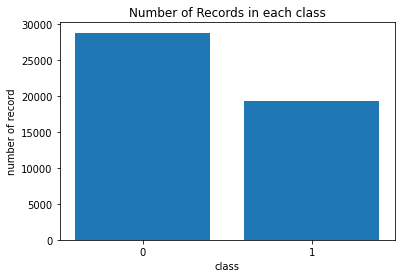

In [ ]:
# calculate the number of each class
n_1 = len(origin_train[origin_train['Outcome']==1])
n_0 = len(origin_train[origin_train['Outcome']==0])
print("# of records in class 1:", n_1)
print("# of records in class 0:", n_0)
plt.bar([0,1],[n_1,n_0])
plt.xticks([0,1])
plt.xlabel('class')
plt.ylabel('number of record')
plt.title('Number of Records in each class')
plt.show()

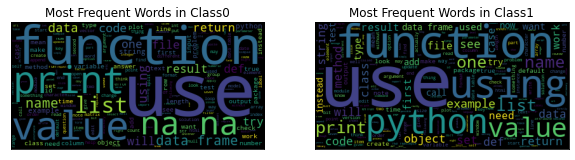

In [ ]:
# find high-frequency words in each class
fig, ax = plt.subplots(1, 2, figsize=(10,5))

def word_cloud(text, class_nb):
  wordcloud = WordCloud().generate((" ").join([ i for i in text]))
  ax[class_nb].imshow(wordcloud.recolor(random_state=2017))
  ax[class_nb].set_title('Most Frequent Words in Class' + str(class_nb))
  ax[class_nb].set_xticks([])
  ax[class_nb].set_yticks([])

text_0 = origin_train[origin_train['Outcome']==0]['Comment'].values.tolist()
word_cloud(text_0, 0)
text_1 = origin_train[origin_train['Outcome']==1]['Comment'].values.tolist()
word_cloud(text_1, 1)

plt.show()

In [ ]:
# calculate length of text in each class
def text_size(text_list):
    sizes = []
    for text in text_list:
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)



class0_size = text_size(text_0)
class1_size = text_size(text_1)
print("avg text length of class 0:", np.mean(class0_size))
print("avg text length of class 1:", np.mean(class1_size))

avg text length of class 0: 75.09673243229247
avg text length of class 1: 120.39977817060067


### Data Preprocessing

In [ ]:
# import re
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# from nltk.corpus import stopwords
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# from bs4 import BeautifulSoup
# !pip install texthero==1.1.0 -q
# import texthero as hero

In [ ]:
# # basic cleaning
# def review_to_words( raw_review ):
#     # # 1. Remove HTML
#     # review_text = BeautifulSoup(raw_review).get_text() 
#     # 2. Only keep letters
#     letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
#     # letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
#     # 3. Remove URLs
#     clean_text = hero.remove_urls(pd.Series(letters_only))[0]
#     # 4. Convert to lower case
#     words = clean_text.lower() 
                            
    
#     return words 

In [ ]:
# origin_train["clean"] = origin_train['Comment'].apply(review_to_words)
# test["clean"] = test['Comment'].apply(review_to_words)
# print(origin_train.head)

In [ ]:
# save all the datasets after preprocessing
# origin_train.to_csv(path+'/origin_train_easyclean.csv', index=False)
# test.to_csv(path+'/test_easyclean.csv', index=False)

### Model: Simpletransformers

reference: https://github.com/ThilinaRajapakse/simpletransformers

In [ ]:
# # input the datasets after preprocessing
# origin_train = pd.read_csv(path+'/origin_train_easyclean.csv')
# test = pd.read_csv(path+'/test_easyclean.csv')

#### install package

In [ ]:
! pip install simpletransformers

     |████████████████████████████████| 249 kB 10.5 MB/s 
     |████████████████████████████████| 10.1 MB 22.9 MB/s 
     |████████████████████████████████| 1.7 MB 57.6 MB/s 
     |████████████████████████████████| 325 kB 55.7 MB/s 
     |████████████████████████████████| 3.8 MB 37.1 MB/s 
     |████████████████████████████████| 6.5 MB 69.9 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 62.7 MB/s 
     |████████████████████████████████| 895 kB 56.7 MB/s 
     |████████████████████████████████| 596 kB 55.4 MB/s 
     |████████████████████████████████| 67 kB 7.6 MB/s 
     |████████████████████████████████| 181 kB 73.7 MB/s 
     |████████████████████████████████| 144 kB 75.3 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 212 kB 76.7 MB/s 
     |████████████████████████████████| 1.1 MB 54.8 MB/s 
     |████████████████████████████████| 134 kB 78.7 MB/s 
     |█████████████

#### Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_features, validation_features, train_labels, validation_labels = train_test_split(origin_train['clean'], origin_train['Outcome'], test_size=0.3, random_state=123)
# train_clean = pd.DataFrame(columns={'text','labels'})
# train_clean['text'] = train_features
# train_clean['labels'] = train_labels
# validation_clean = pd.DataFrame(columns={'text','labels'})
# validation_clean['text'] = validation_features
# validation_clean['labels'] = validation_labels

In [ ]:
train_features, validation_features, train_labels, validation_labels = train_test_split(origin_train['Comment'], origin_train['Outcome'], test_size=0.3, random_state=123)
train_comment = pd.DataFrame(columns={'text','labels'})
train_comment['text'] = train_features
train_comment['labels'] = train_labels
validation_comment = pd.DataFrame(columns={'text','labels'})
validation_comment['text'] = validation_features
validation_comment['labels'] = validation_labels

#### Build model

In [ ]:
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import accuracy_score

##### original dataset
epochs = 3 0.75
epochs = 2 0.757

In [ ]:
# train on dataset without cleaning
args = {'num_train_epochs': 2}
spl_model = ClassificationModel('bert', 'bert-base-uncased', args = args, use_cuda=True)
spl_model.train_model(train_comment)

In [ ]:
train_pred, raw_outputs = spl_model.predict(train_comment['text'].values.tolist())
print("Train acc:", accuracy_score(train_comment['labels'],train_pred))
validation_pred, raw_outputs = spl_model.predict(validation_comment['text'].values.tolist())
print("Validation acc:", accuracy_score(validation_comment['labels'],validation_pred))

  0%|          | 0/33713 [00:00<?, ?it/s]

  0%|          | 0/4215 [00:00<?, ?it/s]

Train acc: 0.8914661999822027


  0%|          | 0/14449 [00:00<?, ?it/s]

  0%|          | 0/1807 [00:00<?, ?it/s]

Validation acc: 0.7574226590075438


In [ ]:
# retrain with all the original training dataset
args = {'num_train_epochs': 2}
spl_model = ClassificationModel('bert', 'bert-base-uncased', args = args, use_cuda=True)
spl_model.train_model(train_comment)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

  0%|          | 0/33713 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/4215 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/4215 [00:00<?, ?it/s]

(8430, 0.5131483471690548)

In [ ]:
test_pred, raw_outputs = spl_model.predict(test['Comment'].values.tolist())
df_result = pd.DataFrame()
df_result['Id'] = test['Id']
df_result['Outcome'] = test_pred
df_result.to_csv(path+'/result_simpletransformer_comment.csv', index=False)

  0%|          | 0/28863 [00:00<?, ?it/s]

  0%|          | 0/3608 [00:00<?, ?it/s]

##### cleaned dataset 

In [ ]:
# # train on dataset with easy preprocessing
# args = {'num_train_epochs': 5}
# spl_model_easyclean = ClassificationModel('bert', 'bert-base-uncased', args = args, use_cuda=True)
# spl_model_easyclean.train_model(train_clean)


In [ ]:
# train_pred, raw_outputs = spl_model_easyclean.predict(train_clean['text'].values.tolist())
# print("Train acc:", accuracy_score(train_clean['labels'],train_pred))
# validation_pred, raw_outputs = spl_model_easyclean.predict(validation_clean['text'].values.tolist())
# print("Validation acc:", accuracy_score(validation_clean['labels'],validation_pred))

In [ ]:
# test_pred, raw_outputs = spl_model_easyclean.predict(test['clean'].values.tolist())
# df_result = pd.DataFrame()
# df_result['Id'] = test['Id']
# df_result['Outcome'] = test_pred
# df_result.to_csv(path+'/result_simpletransformer_clean.csv', index=False)

## Package 2: kashgari (unable to run completely because my equipment is not powerful enough) 

reference:
-  https://gitcode.net/mirrors/BrikerMan/Kashgari?utm_source=csdn_github_accelerator
- https://github.com/google-research/bert

In [ ]:
!pip install kashgari-tf
# CPU
!pip install tensorflow==1.14.0
# GPU
!pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 75 kB 2.3 MB/s 
     |████████████████████████████████| 17.3 MB 552 kB/s 
     |████████████████████████████████| 24.1 MB 120.4 MB/s 
     |████████████████████████████████| 24.0 MB 1.5 MB/s 
     |████████████████████████████████| 23.9 MB 1.5 MB/s 
     |████████████████████████████████| 11.3 MB 45.4 MB/s 
     |████████████████████████████████| 11.3 MB 15.8 MB/s 
     |████████████████████████████████| 11.3 MB 42.8 MB/s 
     |████████████████████████████████| 11.5 MB 37.2 MB/s 
     |████████████████████████████████| 10.8 MB 23.4 MB/s 
     |████████████████████████████████| 9.9 MB 512 kB/s 
     |████████████████████████████████| 9.9 MB 5.7 MB/s 
     |████████████████████████████████| 9.9 MB 637 kB/s 
     |████████████████████████████████| 9.9 MB 601 kB/s 
     |████████████████████████████████| 9.9 MB 1.3 MB/s 
     |████████████████████████████████| 9.9 MB 597 kB/s 
     |████████████████████████████████| 9.5 MB 1.0 MB/s 
  Created wheel 

     |████████████████████████████████| 109.3 MB 1.1 MB/s 
     |████████████████████████████████| 3.1 MB 27.7 MB/s 
     |████████████████████████████████| 488 kB 60.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.3
    Uninstalling tensorflow-2.5.3:
      Successfully uninstalled tensorflow-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kashgari 2.0.0 requires numpy>=1.18.1, but you have numpy 1.16.4 which is incompatible.
kashgari 2.0.0

     |████████████████████████████████| 377.1 MB 8.2 kB/s 


### Set path

In [ ]:
path = '/content/gdrive/My Drive/BT5153/22.3.28'

In [ ]:
import pandas as pd

In [ ]:
# input the datasets after preprocessing
origin_train = pd.read_csv(path+'/origin_train_easyclean.csv')
test = pd.read_csv(path+'/test_easyclean.csv')

### Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_features, validation_features, train_labels, validation_labels = train_test_split(origin_train['clean'], origin_train['Outcome'], test_size=0.3, random_state=123)
train_clean = pd.DataFrame(columns={'text','labels'})
train_clean['text'] = train_features
train_clean['labels'] = train_labels
validation_clean = pd.DataFrame(columns={'text','labels'})
validation_clean['text'] = validation_features
validation_clean['labels'] = validation_labels

In [ ]:
train_features, validation_features, train_labels, validation_labels = train_test_split(origin_train['Comment'], origin_train['Outcome'], test_size=0.3, random_state=123)
train_comment = pd.DataFrame(columns={'text','labels'})
train_comment['text'] = train_features
train_comment['labels'] = train_labels
validation_comment = pd.DataFrame(columns={'text','labels'})
validation_comment['text'] = validation_features
validation_comment['labels'] = validation_labels

### Model

In [ ]:
!pip install numpy==1.17.0

     |████████████████████████████████| 20.3 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.17.0 which is incompatible.
pywavelets 1.3.0 requires numpy>=1.17.3, but you have numpy 1.17.0 which is incompatible.
kashgari 2.0.0 requires numpy>=1.18.1, but you have numpy 1.17.0 which is incompatible.
kashgari 2.0.0 requires tensorflow>=2.1.0, but you have tensorflow 1.14.0 which is incompatible.
kashgari-tf 0.5.5 requires numpy==1.16.4, but you have numpy 1.17.0 which is incompatible.
kapre 0.3.7 requires numpy>=1.18.5, but you have numpy 1.17.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is

In [ ]:
import kashgari
from kashgari.tasks.classification import BiGRU_Model
from kashgari.embeddings import BertEmbedding

import logging
logging.basicConfig(level='DEBUG')

from transformers import BertTokenizerFast

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(train_clean['text'])

34677    here s a small kmeans that uses any of the    ...
33242    in python   callable fn  in python   isinstanc...
37481    for key  value in your dict items    if key no...
9761     we can also use parse date time library lubrid...
36125    running source from a cronfile won t work as c...
                               ...                        
7763     so  the code in my own data that returns the e...
15377    try parsing it as csv and see if you get an er...
17730    for pypy you would need to utilize something l...
28030    assuming you are writing your client code on w...
15725    beyond compare s text compare has an  open cli...
Name: text, Length: 33713, dtype: object


In [ ]:
bert_embedding = BertEmbedding(path + '/pre-trained bert model')
tokenizer = BertTokenizerFast.from_pretrained(path + '/pre-trained bert model')

def sentences2token(sentences):
  sentences_tokenized = []
  for sentence in sentences:
    sentence_tokenized = tokenizer.tokenize(sentence)
    sentences_tokenized.append(sentence_tokenized)
  return sentences_tokenized

sentences_tokenized_train = sentences2token(train_clean['text'].values.tolist())
sentences_tokenized_validation = sentences2token(validation_clean['text'].values.tolist())
train_x, train_y = sentences_tokenized_train, train_clean['labels'].values.tolist()
validate_x, validate_y = sentences_tokenized_validation, validation_clean['labels'].values.tolist()

# train_x, train_y = train_clean['text'].values.tolist(), train_clean['labels'].values.tolist()
# validate_x, validate_y = validation_clean['text'].values.tolist(), validation_clean['labels'].values.tolist()

bigru_model = BiGRU_Model(bert_embedding)
bigru_model.fit(
    train_x, train_y,
    validate_x, validate_y,
    epochs=3,
    batch_size=32
)

2022-03-28 11:08:25,977 [DEBUG] kashgari - ------------------------------------------------
2022-03-28 11:08:25,981 [DEBUG] kashgari - Loaded transformer model's vocab
2022-03-28 11:08:25,985 [DEBUG] kashgari - config_path       : /content/gdrive/My Drive/BT5153/22.3.28/pre-trained bert model/bert_config.json
2022-03-28 11:08:25,992 [DEBUG] kashgari - vocab_path      : /content/gdrive/My Drive/BT5153/22.3.28/pre-trained bert model/vocab.txt
2022-03-28 11:08:25,997 [DEBUG] kashgari - checkpoint_path : /content/gdrive/My Drive/BT5153/22.3.28/pre-trained bert model/bert_model.ckpt
2022-03-28 11:08:26,003 [DEBUG] kashgari - Top 50 words    : ['[PAD]', '[unused0]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[un

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1053/1053 [==============================] - ETA: 0s - loss: 0.5912 - accuracy: 0.6845 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fabf9d59dd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
# Evaluate the model
print("Train acc:", bigru_model.evaluate(train_clean['text'].values.tolist(), train_clean['labels'].values))
print("Validation acc:", bigru_model.evaluate(train_clean['text'].values.tolist(), train_clean['labels'].values))

In [ ]:
# Model data will save to `saved_ner_model` folder
bigru_model.save(path+'\bigru_model')

# Load saved model
bigru_model = BiGRU_Model.load_model(path+'\bigru_model')

In [ ]:
test_pred, raw_outputs = bigru_model.predict(test['Comment'].values.tolist())
df_result = pd.DataFrame()
df_result['Id'] = test['Id']
df_result['Outcome'] = test_pred
df_result.to_csv(path+'/result_bigru_comment.csv', index=False)